# <center>MIE1624 – Introduction to Data Science and Analytics</center>

## <center>Assignment 2</center>


#### <center>Yunjie Xu 1008601951</center>    

In [1]:
## import packages
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer # impute missing values by this method
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.feature_selection import SelectKBest, chi2, RFE

In [2]:
# warning remove 
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('clean_kaggle_data_2022.csv')
df = df.drop(labels=0, axis=0)
pd.set_option('display.max_columns', None)
df.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q6_10,Q6_11,Q6_12,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q7_6,Q7_7,Q8,Q9,Q10_1,Q10_2,Q10_3,Q11,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q12_8,Q12_9,Q12_10,Q12_11,Q12_12,Q12_13,Q12_14,Q12_15,Q13_1,Q13_2,Q13_3,Q13_4,Q13_5,Q13_6,Q13_7,Q13_8,Q13_9,Q13_10,Q13_11,Q13_12,Q13_13,Q13_14,Q14_1,Q14_2,Q14_3,Q14_4,Q14_5,Q14_6,Q14_7,Q14_8,Q14_9,Q14_10,Q14_11,Q14_12,Q14_13,Q14_14,Q14_15,Q14_16,Q15_1,Q15_2,Q15_3,Q15_4,Q15_5,Q15_6,Q15_7,Q15_8,Q15_9,Q15_10,Q15_11,Q15_12,Q15_13,Q15_14,Q15_15,Q16,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q17_13,Q17_14,Q17_15,Q18_1,Q18_2,Q18_3,Q18_4,Q18_5,Q18_6,Q18_7,Q18_8,Q18_9,Q18_10,Q18_11,Q18_12,Q18_13,Q18_14,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q19_8,Q20_1,Q20_2,Q20_3,Q20_4,Q20_5,Q20_6,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_7,Q21_8,Q21_9,Q21_10,Q22,Q23,Q24,Q25,Q26,Q27,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q28_6,Q28_7,Q28_8,Q29,Q30,Q31_1,Q31_2,Q31_3,Q31_4,Q31_5,Q31_6,Q31_7,Q31_8,Q31_9,Q31_10,Q31_11,Q31_12,Q32,Q33_1,Q33_2,Q33_3,Q33_4,Q33_5,Q34_1,Q34_2,Q34_3,Q34_4,Q34_5,Q34_6,Q34_7,Q34_8,Q35_1,Q35_2,Q35_3,Q35_4,Q35_5,Q35_6,Q35_7,Q35_8,Q35_9,Q35_10,Q35_11,Q35_12,Q35_13,Q35_14,Q35_15,Q35_16,Q36_1,Q36_2,Q36_3,Q36_4,Q36_5,Q36_6,Q36_7,Q36_8,Q36_9,Q36_10,Q36_11,Q36_12,Q36_13,Q36_14,Q36_15,Q37_1,Q37_2,Q37_3,Q37_4,Q37_5,Q37_6,Q37_7,Q37_8,Q37_9,Q37_10,Q37_11,Q37_12,Q37_13,Q38_1,Q38_2,Q38_3,Q38_4,Q38_5,Q38_6,Q38_7,Q38_8,Q39_1,Q39_2,Q39_3,Q39_4,Q39_5,Q39_6,Q39_7,Q39_8,Q39_9,Q39_10,Q39_11,Q39_12,Q40_1,Q40_2,Q40_3,Q40_4,Q40_5,Q40_6,Q40_7,Q40_8,Q40_9,Q40_10,Q40_11,Q40_12,Q40_13,Q40_14,Q40_15,Q41_1,Q41_2,Q41_3,Q41_4,Q41_5,Q41_6,Q41_7,Q41_8,Q41_9,Q42_1,Q42_2,Q42_3,Q42_4,Q42_5,Q42_6,Q42_7,Q42_8,Q42_9,Q43,Q44_1,Q44_2,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12,Q29_Encoded,Q29_buckets
1,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,Udemy,NaN,NaN,NaN,NaN,Other,NaN,"Online courses (Coursera, EdX, etc)",NaN,NaN,"Kaggle (notebooks, competitions, etc)",NaN,NaN,Some college/university study without earning ...,NaN,NaN,NaN,NaN,10-20 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Visual Studio Code (VSCode),NaN,NaN,NaN,Sublime Text,Vim / Emacs,NaN,Jupyter Notebook,NaN,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deepnote Notebooks,NaN,NaN,NaN,Matplotlib,Seaborn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-2 years,Scikit-learn,NaN,NaN,PyTorch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Huggingface,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Transformer Networks (BERT, gpt-3, etc)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,"Word embeddings/vectors (GLoVe, fastText, word...","Encoder-decoder models (seq2seq, vanilla trans...",NaN,"Transformer language models (GPT-3, BERT, XLne...",NaN,NaN,NaN,NaN,Huggingface Models,NaN,NaN,ONNX models,NaN,NaN,NaN,Other storage services (i.e. google drive),Huggingface Models,Data Scientist,Online Service/Internet-based Services,0-49 employees,1-2,"We recently started using ML methods (i.e., mo...",NaN,NaN,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,Experimentation and iteration to improve exist...,NaN,NaN,NaN,"25,000-29,999","$1000-$9,999",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MongoDB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,ONNX Runtime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weights & Biases,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,GPUs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-5 times,Twitter (data science influencers),NaN,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Scie

In [4]:
df.shape[0]

8136

## Part 1 Data Cleaning 

   
    
### General Processing 
    
    This part includes three steps:
    
    * Respondent time checking
    * Fill and replace value generally 
    * Removing 'Other' columns
    
    The first is that removing useless respondent based on duration of time, the second is filling 0 with NaN values and replace string with 1 in multiple choice question. Thirdly, although there are many people chosing 'Other' in mutiple choice question, this does not represent that these people have certain underlying similarities. For example in q6, I cannot conclude that poeple who choose 'Other' use the same platform to study mashine learning.
    
    The minimum respond duration is 120 seconds, thus there are not existing observations which needs to be removed from the time point. Then, the duration cloumns is needless thus I drop it.

In [5]:
min(df['Duration (in seconds)'].astype(None).values)

134.0

In [6]:
# Duration (in seconds)
df = df.drop(['Duration (in seconds)'], axis=1)

In [7]:
# repalce each column execept the target column
df = df.rename(columns={'Q29_Encoded': 'Target'})

In [8]:
# Fill the null values with 0.
df.fillna(0, inplace = True)

# For all mutiple choice questions columns, impute value with 1 to replace different strings in each columns 
for i in df.columns:
    if '_' in i:
        df[str(i)] = np.where((df[str(i)] != 0), 1, df[str(i)])

In [9]:
Other_columns = ['Q6_12','Q7_7','Q12_15','Q13_14','Q14_16','Q15_15','Q17_15','Q18_14','Q19_8','Q20_6',
                 'Q21_10','Q28_8','Q31_12','Q33_5','Q34_8','Q35_16','Q36_15','Q37_13','Q38_8','Q39_12',
                 'Q40_15','Q41_9','Q42_9','Q44_12']

df = df.drop(Other_columns, axis=1)

### Q2.  What is your age?
    This is a ordinal categorical variable with 11 levels and without no null values.

In [10]:
df['Q2'].value_counts()

25-29    1604
30-34    1430
35-39    1207
40-44    1037
22-24     743
45-49     701
50-54     567
55-59     359
60-69     341
18-21      83
70+        64
Name: Q2, dtype: int64

In [11]:
# Encode variable
Q2_encoded = {
    "18-21": 0,
    "22-24": 1,
    "25-29": 2,
    "30-34": 3,
    "35-39": 4,
    "40-44": 5,
    "45-49": 6,
    "50-54": 7,
    "55-59": 8,
    "60-69": 9,
    "70+": 10
}

df['Q2'] = df['Q2'].map(Q2_encoded)

# set the variable type as categorical variable
# df['Q2'] = pd.Categorical(df['Q2'])

### Q3. What is your gender? 
    q3 is a nominal categorical variable originally with 5 levels and without null value. However, there are only few people from 'Prefer not to say','Nonbinary ' and 'Prefer to self-describe', thus I decided to combine these three groups into one new group

In [12]:
df['Q3'].value_counts()

Man                        6635
Woman                      1382
Prefer not to say            89
Nonbinary                    22
Prefer to self-describe       8
Name: Q3, dtype: int64

In [13]:
# Encode variable
Q3_encoded = {
    'Man': 'Man',
    'Woman':'Woman',
    'Prefer not to say':'Gender Minority',
    'Nonbinary':'Gender Minority',
    'Prefer to self-describe':'Gender Minority'
}

df['Q3'] = df['Q3'].map(Q3_encoded)

df = pd.get_dummies(df, columns=['Q3'])

### Q4. In which country do you currently reside?

    q4 is a nominal categorical variable originally without null value. However, it should be noted that too many levels and very unequal distribution of level may mislead our analysis. Combined with practical experienced, people who work in high-income countries having higher salary normally. Thus, according to New World Bank country classifications by income level: 2022-2023，I calssify countries into Not classified, low, lower-middle, upper-middle, and high income 5 groups, and region variable now will change to a ordinal categorical variable.
    
    However, there is only one country belongs to Low Income country (Ethiopia: 33 people), thus I combine Low Income and Lower Middle Income into one new group
    
    * Others (Not classified,I do not wish to disclose my location): 0
    * Low Income & Lower Middle Income                             : 1
    * Upper Middle Income                                          : 2
    * High Income                                                  : 3
    
    
https://blogs.worldbank.org/opendata/new-world-bank-country-classifications-income-level-2022-2023

In [14]:
df['Q4'].value_counts()

India                                                   2328
United States of America                                1434
Other                                                    511
Japan                                                    333
Brazil                                                   292
Nigeria                                                  159
Spain                                                    140
United Kingdom of Great Britain and Northern Ireland     139
Mexico                                                   139
France                                                   137
South Korea                                              131
Pakistan                                                 131
Canada                                                   117
Turkey                                                   114
Taiwan                                                   110
China                                                    108
Indonesia               

In [15]:
Q4_encoded = {
    'India': 1,
    'United States of America': 3,
    'Other': 0,
    'Brazil': 2,
    'Nigeria': 1,
    'Pakistan': 1,
    'Japan': 3,
    'China': 2,
    'Egypt': 1,
    'Mexico': 2,
    'Indonesia': 1,
    'Turkey': 2,
    'Russia': 2,
    'South Korea': 3,
    'France': 3,
    'United Kingdom of Great Britain and Northern Ireland': 3,
    'Spain': 3,
    'Canada': 3,
    'Colombia': 2,
    'Bangladesh': 1,
    'Taiwan': 3,
    'Viet Nam': 1,
    'Argentina': 2,
    'Kenya': 1,
    'Italy': 3,
    'Morocco': 1,
    'Australia': 3,
    'Thailand': 2,
    'Tunisia': 1,
    'Peru': 2,
    'Iran, Islamic Republic of...': 1,
    'Chile': 3,
    'Poland': 3,
    'South Africa': 2,
    'Philippines': 1,
    'Netherlands': 3,
    'Ghana': 1,
    'Israel': 3,
    'Germany': 3,
    'Ethiopia': 1,
    'United Arab Emirates': 3,
    'Portugal': 3,
    'Saudi Arabia': 3,
    'Ukraine': 1,
    'Sri Lanka': 1,
    'Nepal': 1,
    'Malaysia': 2,
    'Singapore': 3,
    'Cameroon': 1,
    'Algeria': 1,
    'Hong Kong (S.A.R.)': 3,
    'Zimbabwe': 1,
    'Ecuador': 2,
    'Ireland': 3,
    'Belgium': 3,
    'Romania': 3,
    'Czech Republic': 3,
    'I do not wish to disclose my location': 0
   
}

df['Q4'] = df['Q4'].map(Q4_encoded)

In [16]:
df['Q4'].value_counts()

3    3289
1    3248
2    1076
0     523
Name: Q4, dtype: int64

### Q5	Are you currently a student?

    This is a binary categorical variable without null values. I still treate this variable as ordinal categorical variable, becuase I assume that people who have stable job are usually not students.Thus:
    * Yes: 0
    * No:  1
    
    I found poeple are all not being student, thus I remove this question.

In [17]:
df['Q5'].value_counts()

No    8136
Name: Q5, dtype: int64

In [18]:
df = df.drop(['Q5'], axis=1)

### Q8 What is the highest level of formal education that you have attained or plan to attain within the next 2 years?

    * Deleted rows with 'I prefer not to answer' selection. Because this reponse can't provide any useful information on influence of education level.
    
    * The remaining respondents illustrate that eduction level is ordinal categorical varible with 6 levels. I decide combine Doctoral degree and Professional doctorate as a new group called 'Doctor', and combine 'Some college/university study without earning a bachelor’s degree' and 'No formal education past high school' as a new group 'Below Bachelor’s degree' Thus:
    
        1)  Below Bachelor’s degree : 0
        2)  Bachelor’s degree       : 1
        3)  Master’s degree         : 2
        4)  Doctoral degree         : 3

In [19]:
df.drop(df.loc[df['Q8']=='I prefer not to answer'].index, inplace=True)

In [20]:
df['Q8'].value_counts()

Master’s degree                                                      3567
Bachelor’s degree                                                    2005
Doctoral degree                                                      1349
Some college/university study without earning a bachelor’s degree     304
Professional doctorate                                                279
No formal education past high school                                  206
Name: Q8, dtype: int64

In [21]:
# Encode variable
Q8_encoded = {
   'Master’s degree': 2,
   'Bachelor’s degree': 1,
   'Doctoral degree': 3,
   'Some college/university study without earning a bachelor’s degree': 0,
   'Professional doctorate': 3,
   'No formal education past high school':0
}

df['Q8'] = df['Q8'].map(Q8_encoded)

### Q9 Have you ever published any academic research ?

There are more than 2500 people did not responce this question. Thus I delete this question.

In [22]:
df['Q9'].value_counts()

Yes    2672
No     2523
0      2515
Name: Q9, dtype: int64

In [23]:
df = df.drop(['Q9'], axis=1)

### Q11 For how many years have you been writing code and/or programming?
    Q11 is a ordinal categorical variable with 7 levels without null values. 

In [24]:
df['Q11'].value_counts()

1-3 years                    1390
5-10 years                   1342
3-5 years                    1193
10-20 years                  1107
< 1 years                    1063
20+ years                     995
I have never written code     620
Name: Q11, dtype: int64

In [25]:
# Encode variable
Q11_encoded = {
   'I have never written code': 0,
   '< 1 years': 1,
   '1-3 years': 2,
   '3-5 years': 3,
   '5-10 years': 4,
   '10-20 years':5,
   '20+ years':6
}

df['Q11'] = df['Q11'].map(Q11_encoded)

### Q16 For how many years have you used machine learning methods?

In [26]:
df['Q16'].value_counts()

Under 1 year                             1629
1-2 years                                1199
I do not use machine learning methods    1025
2-3 years                                 916
5-10 years                                789
0                                         620
4-5 years                                 603
3-4 years                                 576
10-20 years                               353
Name: Q16, dtype: int64

In [27]:
# Encode variable
Q16_encoded = {
   'I do not use machine learning methods': 0,
   'Under 1 year': 1,
   '1-2 years': 2,
   '2-3 years': 3,
   '3-4 years': 3,
   '4-5 years':4,
   '5-10 years':5,
   '10-20 years':6
}

df['Q16'] = df['Q16'].map(Q16_encoded)

# 
df['Q16'].replace(0, np.nan, inplace=True)

### Q22


In [28]:
df['Q22'].value_counts()

0                                             6174
 Kaggle datasets                               584
  TensorFlow Hub                               336
 Huggingface Models                            278
 PyTorch Hub                                   175
 Timm                                           75
Other storage services (i.e. google drive)      33
 NVIDIA NGC models                              29
 ONNX models                                    20
 Jumpstart                                       6
Name: Q22, dtype: int64

In [29]:
df = df.drop(['Q22'], axis=1)

### Q23


In [30]:
df['Q23'].value_counts()

Data Scientist                                                      1636
Data Analyst (Business, Marketing, Financial, Quantitative, etc)    1276
Software Engineer                                                    806
Manager (Program, Project, Operations, Executive-level, etc)         723
Teacher / professor                                                  690
Other                                                                649
Research Scientist                                                   507
Machine Learning/ MLops Engineer                                     485
Engineer (non-software)                                              382
Data Engineer                                                        270
Statistician                                                          98
Data Architect                                                        77
Data Administrator                                                    60
Developer Advocate                                 

In [31]:
df = pd.get_dummies(df, columns=['Q23'])

In [32]:
df = df.drop(['Q23_Other'], axis=1)

### Q24

In [33]:
df['Q24'].value_counts()

Computers/Technology                      1941
Academics/Education                       1213
Accounting/Finance                         706
Other                                      619
Manufacturing/Fabrication                  466
Government/Public Service                  433
Medical/Pharmaceutical                     432
Online Service/Internet-based Services     401
Retail/Sales                               355
Energy/Mining                              270
Insurance/Risk Assessment                  212
Marketing/CRM                              209
Non-profit/Service                         165
Broadcasting/Communications                157
Shipping/Transportation                    131
Name: Q24, dtype: int64

In [34]:
df = pd.get_dummies(df, columns=['Q24'])
df = df.drop(['Q24_Other'], axis=1)

### Q25

In [35]:
df['Q25'].value_counts()

10,000 or more employees    1847
0-49 employees              1734
1000-9,999 employees        1645
50-249 employees            1329
250-999 employees           1155
Name: Q25, dtype: int64

In [36]:
# Encode variable
Q25_encoded = {
   '0-49 employees': 0,
   '50-249 employees': 1,
   '250-999 employees': 2,
   '1000-9,999 employees': 3,
   '10,000 or more employees': 4,
}

df['Q25'] = df['Q25'].map(Q25_encoded)

### Q26

In [37]:
df['Q26'].value_counts()

20+      1993
1-2      1559
0        1193
3-4      1185
5-9       984
10-14     565
15-19     231
Name: Q26, dtype: int64

In [38]:
# Encode variable
Q26_encoded = {
   '1-2': 0,
   '3-4': 1,
   '5-9': 2,
   '10-14': 3,
   '15-19': 4,
   '20+': 5
}

df['Q26'] = df['Q26'].map(Q26_encoded)

#
df['Q26'].replace(0, np.nan, inplace=True)

### Q27

In [39]:
df['Q27'].value_counts()

No (we do not use ML methods)                                                                1708
We have well established ML methods (i.e., models in production for more than 2 years)       1609
We are exploring ML methods (and may one day put a model into production)                    1359
I do not know                                                                                1137
We recently started using ML methods (i.e., models in production for less than 2 years)      1087
We use ML methods for generating insights (but do not put working models into production)     810
Name: Q27, dtype: int64

In [40]:
# Encode variable
Q27_encoded = {
   'No (we do not use ML methods)': 0,
   'We use ML methods for generating insights (but do not put working models into production)': 1,
   'We are exploring ML methods (and may one day put a model into production)': 2,
   'We recently started using ML methods (i.e., models in production for less than 2 years)': 3,
   'We have well established ML methods (i.e., models in production for more than 2 years)': 4,
}

df['Q27'] = df['Q27'].map(Q27_encoded)

#
df['Q27'].replace('I do not know', np.nan, inplace=True)

### Q29
    Target Encode

In [41]:
df['Target'].value_counts()

0.0     2806
1.0      747
2.0      580
3.0      444
4.0      408
10.0     395
5.0      352
12.0     340
6.0      312
7.0      281
11.0     267
13.0     230
8.0      213
9.0      193
14.0     142
Name: Target, dtype: int64

In [42]:
df.Target.nunique()

15

In [43]:
df = df.drop(['Q29'], axis=1)
df = df.drop(['Q29_buckets'], axis=1)

In [44]:
df.insert(len(df.columns)-1, "Target", df.pop('Target') ) 

### Q30

In [45]:
df['Q30'].value_counts()

$0 ($USD)                  2504
$100-$999                  1902
$1000-$9,999               1344
$1-$99                     1312
$10,000-$99,999             435
$100,000 or more ($USD)     167
0                            46
Name: Q30, dtype: int64

In [46]:
# Encode variable
Q30_encoded = {
   '$0 ($USD)': 0,
   '$1-$99': 1,
   '$100-$999': 2,
   '$1000-$9,999': 3,
   '$10,000-$99,999': 4,
   '$100,000 or more ($USD)':5
}

df['Q30'] = df['Q30'].map(Q30_encoded)

#
df['Q30'].replace(0, np.nan, inplace=True)

### Q32

In [47]:
df['Q32'].value_counts()

0                                                          5923
 Amazon Web Services (AWS)                                  520
 Google Cloud Platform (GCP)                                465
They all had a similarly enjoyable developer experience     420
 Microsoft Azure                                            227
None were satisfactory                                       61
 IBM Cloud / Red Hat                                         34
Other                                                        18
 Oracle Cloud                                                17
 VMware Cloud                                                11
 SAP Cloud                                                    7
 Alibaba Cloud                                                4
 Tencent Cloud                                                3
Name: Q32, dtype: int64

In [48]:
df = df.drop(['Q32'], axis=1)

### Q43

In [49]:
df['Q43'].value_counts()

0                     3493
Never                 2314
2-5 times              883
Once                   564
6-25 times             242
More than 25 times     214
Name: Q43, dtype: int64

In [50]:
df = df.drop(['Q43'], axis=1)

### KNN Classifier to Imputing Missing Value

In [51]:
columns = df.columns

# imputing missing value by KNN
imputer = KNNImputer(n_neighbors=1)
df = imputer.fit_transform(df)

In [52]:
df = pd.DataFrame(df, columns = columns)
df

,Q2,Q4,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q6_10,Q6_11,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q7_6,Q8,Q10_1,Q10_2,Q10_3,Q11,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q12_8,Q12_9,Q12_10,Q12_11,Q12_12,Q12_13,Q12_14,Q13_1,Q13_2,Q13_3,Q13_4,Q13_5,Q13_6,Q13_7,Q13_8,Q13_9,Q13_10,Q13_11,Q13_12,Q13_13,Q14_1,Q14_2,Q14_3,Q14_4,Q14_5,Q14_6,Q14_7,Q14_8,Q14_9,Q14_10,Q14_11,Q14_12,Q14_13,Q14_14,Q14_15,Q15_1,Q15_2,Q15_3,Q15_4,Q15_5,Q15_6,Q15_7,Q15_8,Q15_9,Q15_10,Q15_11,Q15_12,Q15_13,Q15_14,Q16,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q17_13,Q17_14,Q18_1,Q18_2,Q18_3,Q18_4,Q18_5,Q18_6,Q18_7,Q18_8,Q18_9,Q18_10,Q18_11,Q18_12,Q18_13,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q20_1,Q20_2,Q20_3,Q20_4,Q20_5,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_7,Q21_8,Q21_9,Q25,Q26,Q27,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q28_6,Q28_7,Q30,Q31_1,Q31_2,Q31_3,Q31_4,Q31_5,Q31_6,Q31_7,Q31_8,Q31_9,Q31_10,Q31_11,Q33_1,Q33_2,Q33_3,Q33_4,Q34_1,Q34_2,Q34_3,Q34_4,Q34_5,Q34_6,Q34_7,Q35_1,Q35_2,Q35_3,Q35_4,Q35_5,Q35_6,Q35_7,Q35_8,Q35_9,Q35_10,Q35_11,Q35_12,Q35_13,Q35_14,Q35_15,Q36_1,Q36_2,Q36_3,Q36_4,Q36_5,Q36_6,Q36_7,Q36_8,Q36_9,Q36_10,Q36_11,Q36_12,Q36_13,Q36_14,Q37_1,Q37_2,Q37_3,Q37_4,Q37_5,Q37_6,Q37_7,Q37_8,Q37_9,Q37_10,Q37_11,Q37_12,Q38_1,Q38_2,Q38_3,Q38_4,Q38_5,Q38_6,Q38_7,Q39_1,Q39_2,Q39_3,Q39_4,Q39_5,Q39_6,Q39_7,Q39_8,Q39_9,Q39_10,Q39_11,Q40_1,Q40_2,Q40_3,Q40_4,Q40_5,Q40_6,Q40_7,Q40_8,Q40_9,Q40_10,Q40_11,Q40_12,Q40_13,Q40_14,Q41_1,Q41_2,Q41_3,Q41_4,Q41_5,Q41_6,Q41_7,Q41_8,Q42_1,Q42_2,Q42_3,Q42_4,Q42_5,Q42_6,Q42_7,Q42_8,Q44_1,Q44_2,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q3_Gender Minority,Q3_Man,Q3_Woman,Q23_Data Administrator,"Q23_Data Analyst (Business, Marketing, Financial, Quantitative, etc)",Q23_Data Architect,Q23_Data Engineer,Q23_Data Scientist,Q23_Developer Advocate,Q23_Engineer (non-software),Q23_Machine Learning/ MLops Engineer,"Q23_Manager (Program, Project, Operations, Executive-level, etc)",Q23_Research Scientist,Q23_Software Engineer,Q23_Statistician,Q23_Teacher / professor,Q24_Academics/Education,Q24_Accounting/Finance,Q24_Broadcasting/Communications,Q24_Computers/Technology,Q24_Energy/Mining,Q24_Government/Public Service,Q24_Insurance/Risk Assessment,Q24_Manufacturing/Fabrication,Q24_Marketing/CRM,Q24_Medical/Pharmaceutical,Q24_Non-profit/Service,Q24_Online Service/Internet-based Services,Q24_Retail/Sales,Q24_Shipping/Transportation,Target
0,8.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,3.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,

In [53]:
# Check null value again, and there is no missing value anymore
df.isnull().sum()

Q2                                            0
Q4                                            0
Q6_1                                          0
Q6_2                                          0
Q6_3                                          0
                                             ..
Q24_Non-profit/Service                        0
Q24_Online Service/Internet-based Services    0
Q24_Retail/Sales                              0
Q24_Shipping/Transportation                   0
Target                                        0
Length: 293, dtype: int64

In [54]:
df

,Q2,Q4,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q6_10,Q6_11,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q7_6,Q8,Q10_1,Q10_2,Q10_3,Q11,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q12_8,Q12_9,Q12_10,Q12_11,Q12_12,Q12_13,Q12_14,Q13_1,Q13_2,Q13_3,Q13_4,Q13_5,Q13_6,Q13_7,Q13_8,Q13_9,Q13_10,Q13_11,Q13_12,Q13_13,Q14_1,Q14_2,Q14_3,Q14_4,Q14_5,Q14_6,Q14_7,Q14_8,Q14_9,Q14_10,Q14_11,Q14_12,Q14_13,Q14_14,Q14_15,Q15_1,Q15_2,Q15_3,Q15_4,Q15_5,Q15_6,Q15_7,Q15_8,Q15_9,Q15_10,Q15_11,Q15_12,Q15_13,Q15_14,Q16,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q17_13,Q17_14,Q18_1,Q18_2,Q18_3,Q18_4,Q18_5,Q18_6,Q18_7,Q18_8,Q18_9,Q18_10,Q18_11,Q18_12,Q18_13,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q20_1,Q20_2,Q20_3,Q20_4,Q20_5,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_7,Q21_8,Q21_9,Q25,Q26,Q27,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q28_6,Q28_7,Q30,Q31_1,Q31_2,Q31_3,Q31_4,Q31_5,Q31_6,Q31_7,Q31_8,Q31_9,Q31_10,Q31_11,Q33_1,Q33_2,Q33_3,Q33_4,Q34_1,Q34_2,Q34_3,Q34_4,Q34_5,Q34_6,Q34_7,Q35_1,Q35_2,Q35_3,Q35_4,Q35_5,Q35_6,Q35_7,Q35_8,Q35_9,Q35_10,Q35_11,Q35_12,Q35_13,Q35_14,Q35_15,Q36_1,Q36_2,Q36_3,Q36_4,Q36_5,Q36_6,Q36_7,Q36_8,Q36_9,Q36_10,Q36_11,Q36_12,Q36_13,Q36_14,Q37_1,Q37_2,Q37_3,Q37_4,Q37_5,Q37_6,Q37_7,Q37_8,Q37_9,Q37_10,Q37_11,Q37_12,Q38_1,Q38_2,Q38_3,Q38_4,Q38_5,Q38_6,Q38_7,Q39_1,Q39_2,Q39_3,Q39_4,Q39_5,Q39_6,Q39_7,Q39_8,Q39_9,Q39_10,Q39_11,Q40_1,Q40_2,Q40_3,Q40_4,Q40_5,Q40_6,Q40_7,Q40_8,Q40_9,Q40_10,Q40_11,Q40_12,Q40_13,Q40_14,Q41_1,Q41_2,Q41_3,Q41_4,Q41_5,Q41_6,Q41_7,Q41_8,Q42_1,Q42_2,Q42_3,Q42_4,Q42_5,Q42_6,Q42_7,Q42_8,Q44_1,Q44_2,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q3_Gender Minority,Q3_Man,Q3_Woman,Q23_Data Administrator,"Q23_Data Analyst (Business, Marketing, Financial, Quantitative, etc)",Q23_Data Architect,Q23_Data Engineer,Q23_Data Scientist,Q23_Developer Advocate,Q23_Engineer (non-software),Q23_Machine Learning/ MLops Engineer,"Q23_Manager (Program, Project, Operations, Executive-level, etc)",Q23_Research Scientist,Q23_Software Engineer,Q23_Statistician,Q23_Teacher / professor,Q24_Academics/Education,Q24_Accounting/Finance,Q24_Broadcasting/Communications,Q24_Computers/Technology,Q24_Energy/Mining,Q24_Government/Public Service,Q24_Insurance/Risk Assessment,Q24_Manufacturing/Fabrication,Q24_Marketing/CRM,Q24_Medical/Pharmaceutical,Q24_Non-profit/Service,Q24_Online Service/Internet-based Services,Q24_Retail/Sales,Q24_Shipping/Transportation,Target
0,8.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,3.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,

## 2. Exploratory data analysis and feature selection:
### Exploratory data analysis

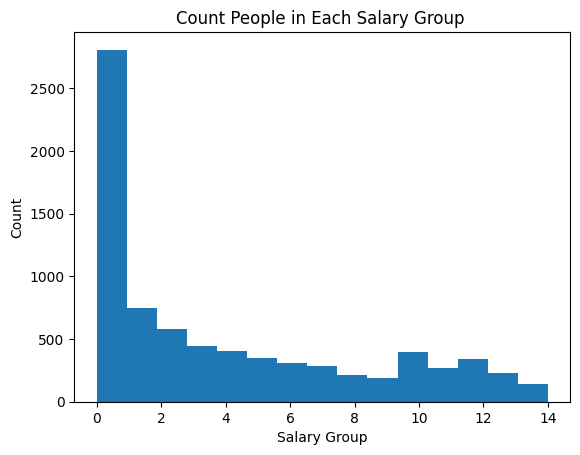

In [55]:
plt.hist(df['Target'].values,bins=15)
plt.xlabel('Salary Group')
plt.ylabel('Count')
plt.title('Count People in Each Salary Group ')
# plt.savefig('f1.png',transparent = True)
plt.show()


### Select Features by Correlation Plot

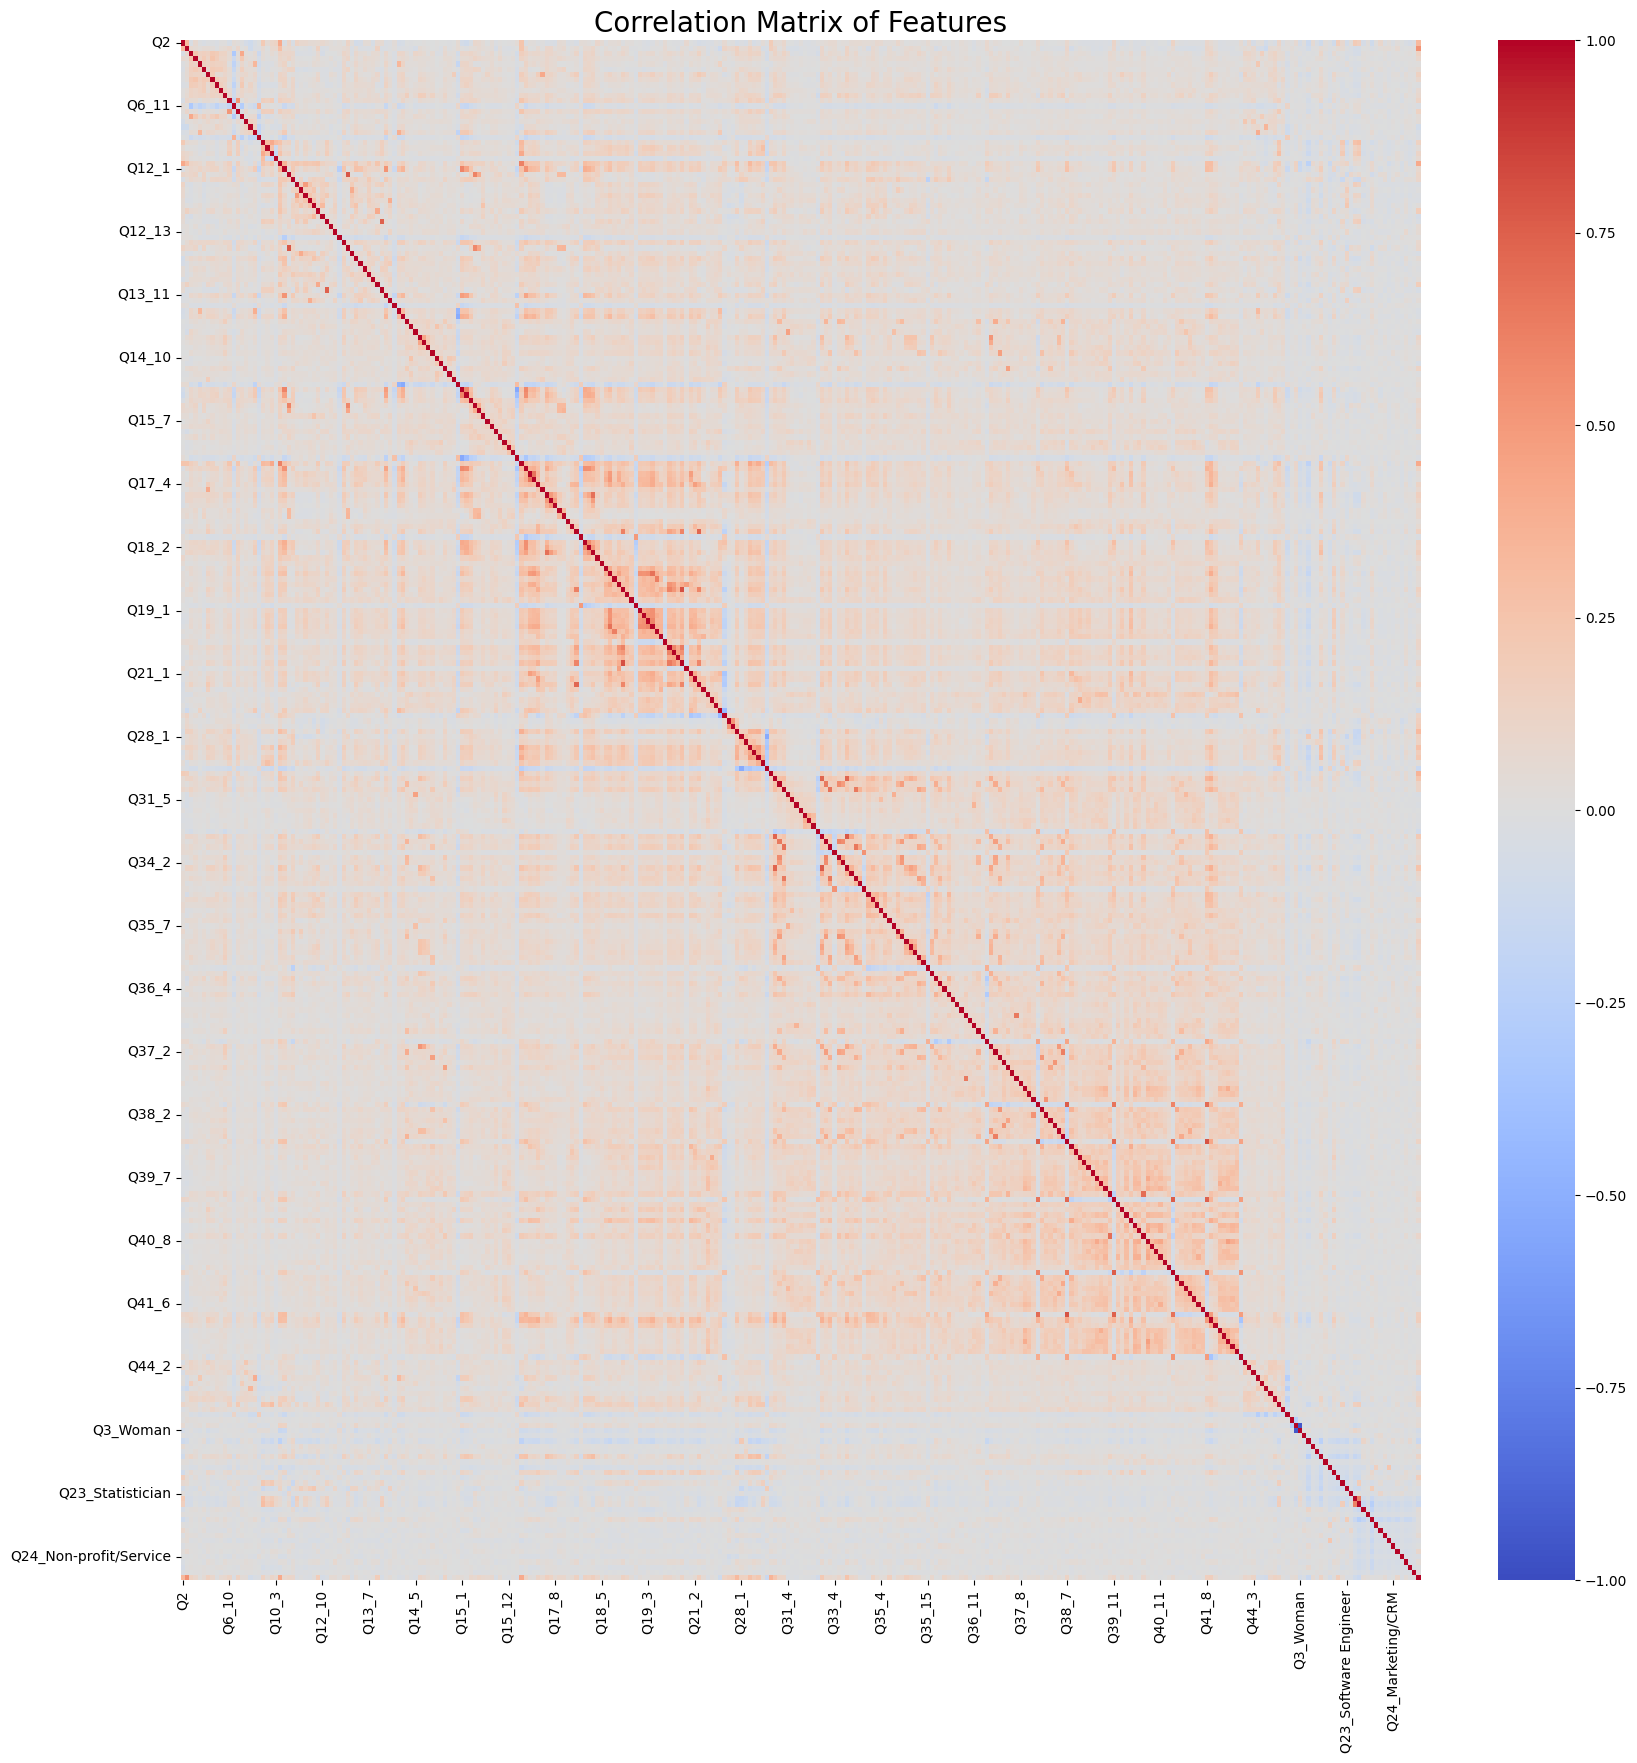

In [56]:
ax = sns.heatmap(df.corr(),vmin=-1, vmax=1, center= 0,cmap='coolwarm')
plt.title('Correlation Matrix of Features',fontsize =20)
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.savefig('f2.png',transparent = True)
plt.show()

#### Print feature importances

In [57]:
salary_correlation = df.corr().Target.sort_values(ascending = False)
top_50_features = abs(salary_correlation)[:51]
top_50_features

Target                                                              1.000000
Q4                                                                  0.538501
Q16                                                                 0.408401
Q11                                                                 0.406491
Q30                                                                 0.351955
Q2                                                                  0.322736
Q27                                                                 0.313134
Q28_3                                                               0.266940
Q34_3                                                               0.254925
Q31_1                                                               0.240026
Q28_5                                                               0.221157
Q33_1                                                               0.213786
Q12_9                                                               0.184749

#### Visualize feature importances

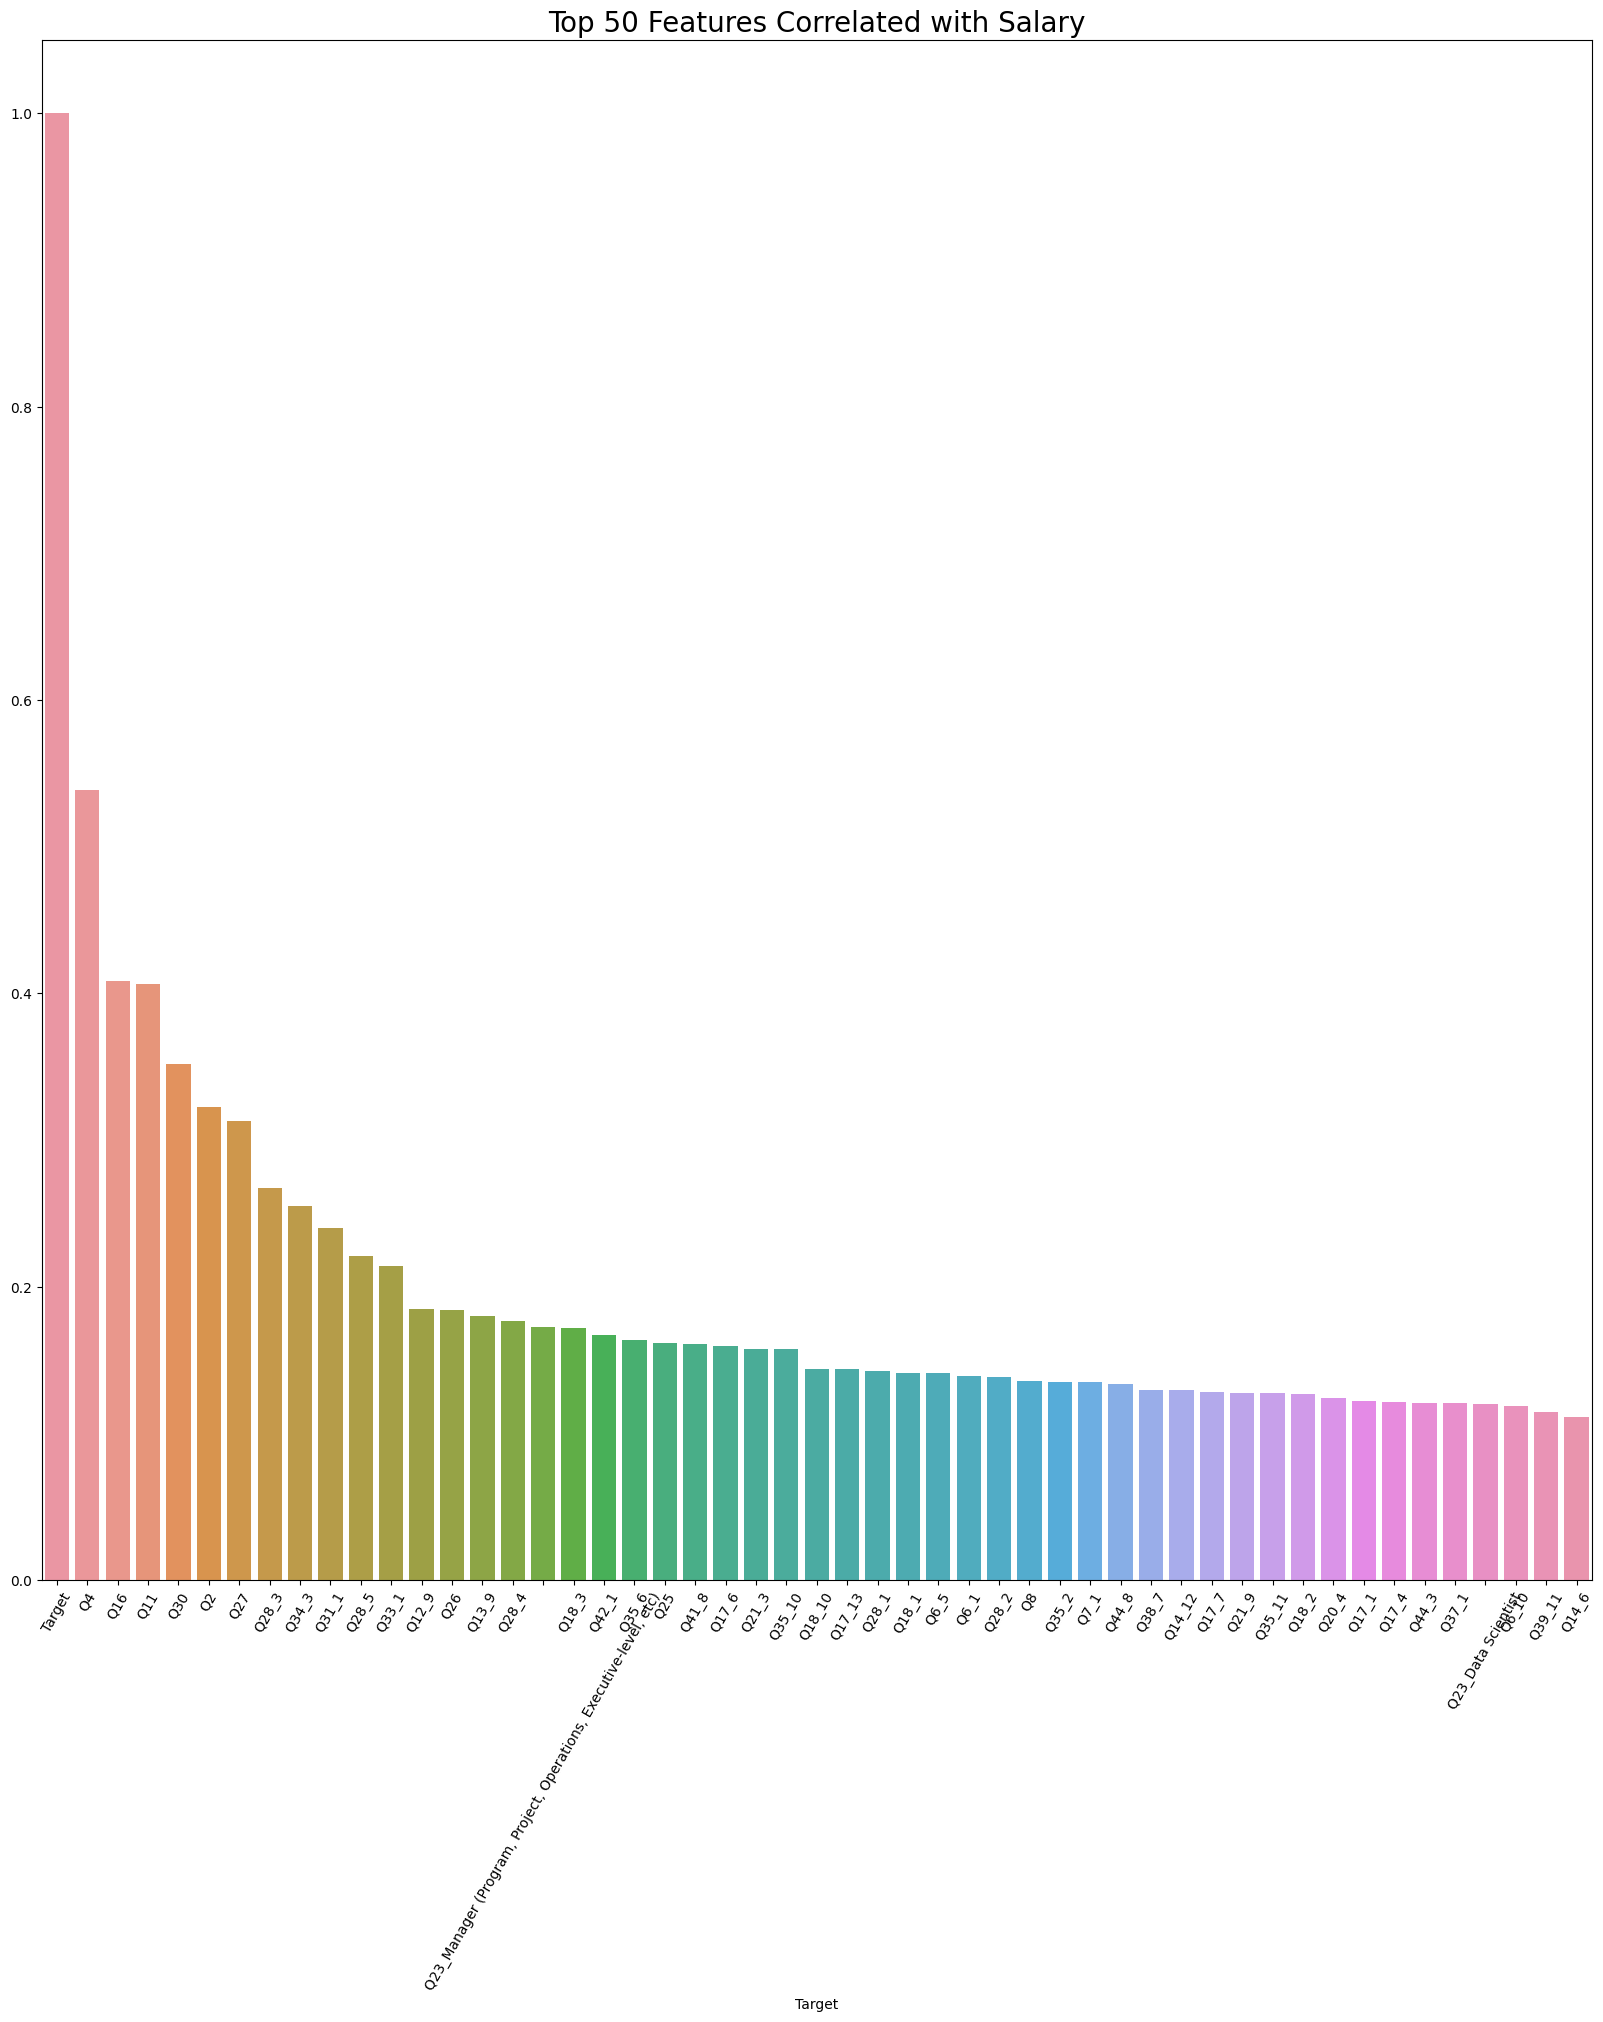

In [58]:
# Plot the barplot of the top 50 features (ranked by correlation).
ax = sns.barplot(x=top_50_features.index, y = top_50_features.values, data=top_50_features, order = top_50_features)
ax.set_xticklabels(top_50_features.index,rotation = 60)
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.title('Top 50 Features Correlated with Salary', fontsize = 20)
plt.savefig('f3.png',transparent = True)
plt.show()

In [59]:
top_50_features_df = df[top_50_features.index]
top_50_features_df

,Target,Q4,Q16,Q11,Q30,Q2,Q27,Q28_3,Q34_3,Q31_1,Q28_5,Q33_1,Q12_9,Q26,Q13_9,Q28_4,"Q23_Manager (Program, Project, Operations, Executive-level, etc)",Q18_3,Q42_1,Q35_6,Q25,Q41_8,Q17_6,Q21_3,Q35_10,Q18_10,Q17_13,Q28_1,Q18_1,Q6_5,Q6_1,Q28_2,Q8,Q35_2,Q7_1,Q44_8,Q38_7,Q14_12,Q17_7,Q21_9,Q35_11,Q18_2,Q20_4,Q17_1,Q17_4,Q44_3,Q37_1,Q23_Data Scientist,Q6_10,Q39_11,Q14_6
0,2.0,3.0,2.0,5.0,3.0,8.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,10.0,3.0,4.0,5.0,2.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,10.0,3.0,5.0,6.0,2.0,10.0,3.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,13.0,3.0,5.0,5.0,2.0,5.0,4.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.0,3.0,5.0,5.0,5.0,5.0,4.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7705,10.0,3.0,1.0,5.0,1.0,5.0,4.0,1.0,0.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7706,0.0,1.0,2.0,2.0,2.0,4.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7707,0.0,1.0,1.0,2.0,1.0,5.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7708,2.0,2.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [60]:
model_lr = linear_model.LinearRegression()
rfe = RFE(model_lr)
fit = rfe.fit(top_50_features_df.drop(['Target'], axis = 1), top_50_features_df['Target'])

features_names = sorted(list(zip(fit.ranking_, top_50_features_df.drop(['Target'], axis = 1))))[:40]
features_list = []
for i in features_names:
    features_list.append(i[1])

In [61]:
top_50_features_df[features_list]

,Q12_9,Q13_9,Q14_12,Q16,Q17_1,Q17_7,Q2,Q21_3,Q21_9,"Q23_Manager (Program, Project, Operations, Executive-level, etc)",Q27,Q28_1,Q28_5,Q30,Q31_1,Q34_3,Q35_10,Q35_11,Q35_6,Q37_1,Q4,Q42_1,Q44_3,Q6_1,Q6_5,Q25,Q18_2,Q28_3,Q23_Data Scientist,Q20_4,Q17_13,Q11,Q33_1,Q26,Q38_7,Q44_8,Q6_10,Q14_6,Q18_10,Q17_4
0,1.0,1.0,0.0,2.0,1.0,0.0,8.0,1.0,0.0,0.0,3.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,5.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,4.0,1.0,0.0,3.0,1.0,0.0,0.0,4.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,5.0,0.0,5.0,0.0,1.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,5.0,0.0,0.0,10.0,0.0,1.0,0.0,3.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,6.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,5.0,1.0,0.0,5.0,1.0,0.0,0.0,4.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,1.0,0.0,1.0,1.0,3.0,1.0,1.0,0.0,1.0,1.0,5.0,1.0,5.0,0.0,1.0,0.0,0.0,1.0,1.0
4,1.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,0.0,0.0,4.0,1.0,1.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,5.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7705,1.0,0.0,0.0,1.0,1.0,0.0,5.0,0.0,1.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0
7706,0.0,0.0,0.0,2.0,1.0,0.0,4.0,0.0,1.0,0.0,4.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0
7707,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7708,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0


In [62]:
top_50_features_df[features_list].shape

(7710, 40)

In [63]:
top_50_features_df['Target']

0        2.0
1       10.0
2       10.0
3       13.0
4       13.0
        ... 
7705    10.0
7706     0.0
7707     0.0
7708     2.0
7709     1.0
Name: Target, Length: 7710, dtype: float64

In [64]:
top_50_features_df

,Target,Q4,Q16,Q11,Q30,Q2,Q27,Q28_3,Q34_3,Q31_1,Q28_5,Q33_1,Q12_9,Q26,Q13_9,Q28_4,"Q23_Manager (Program, Project, Operations, Executive-level, etc)",Q18_3,Q42_1,Q35_6,Q25,Q41_8,Q17_6,Q21_3,Q35_10,Q18_10,Q17_13,Q28_1,Q18_1,Q6_5,Q6_1,Q28_2,Q8,Q35_2,Q7_1,Q44_8,Q38_7,Q14_12,Q17_7,Q21_9,Q35_11,Q18_2,Q20_4,Q17_1,Q17_4,Q44_3,Q37_1,Q23_Data Scientist,Q6_10,Q39_11,Q14_6
0,2.0,3.0,2.0,5.0,3.0,8.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,10.0,3.0,4.0,5.0,2.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,10.0,3.0,5.0,6.0,2.0,10.0,3.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,13.0,3.0,5.0,5.0,2.0,5.0,4.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.0,3.0,5.0,5.0,5.0,5.0,4.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7705,10.0,3.0,1.0,5.0,1.0,5.0,4.0,1.0,0.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7706,0.0,1.0,2.0,2.0,2.0,4.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7707,0.0,1.0,1.0,2.0,1.0,5.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7708,2.0,2.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [65]:
top_40_features_df = pd.merge(top_50_features_df[features_list], 
                              top_50_features_df['Target'],
                              on= np.arange(1, 7711)).drop('key_0', axis = 1)

salary_correlation_40 = top_40_features_df.corr().Target.sort_values(ascending = False)
salary_correlation_40

Target                                                              1.000000
Q4                                                                  0.538501
Q16                                                                 0.408401
Q11                                                                 0.406491
Q30                                                                 0.351955
Q2                                                                  0.322736
Q27                                                                 0.313134
Q28_3                                                               0.266940
Q34_3                                                               0.254925
Q31_1                                                               0.240026
Q28_5                                                               0.221157
Q33_1                                                               0.213786
Q12_9                                                               0.184749

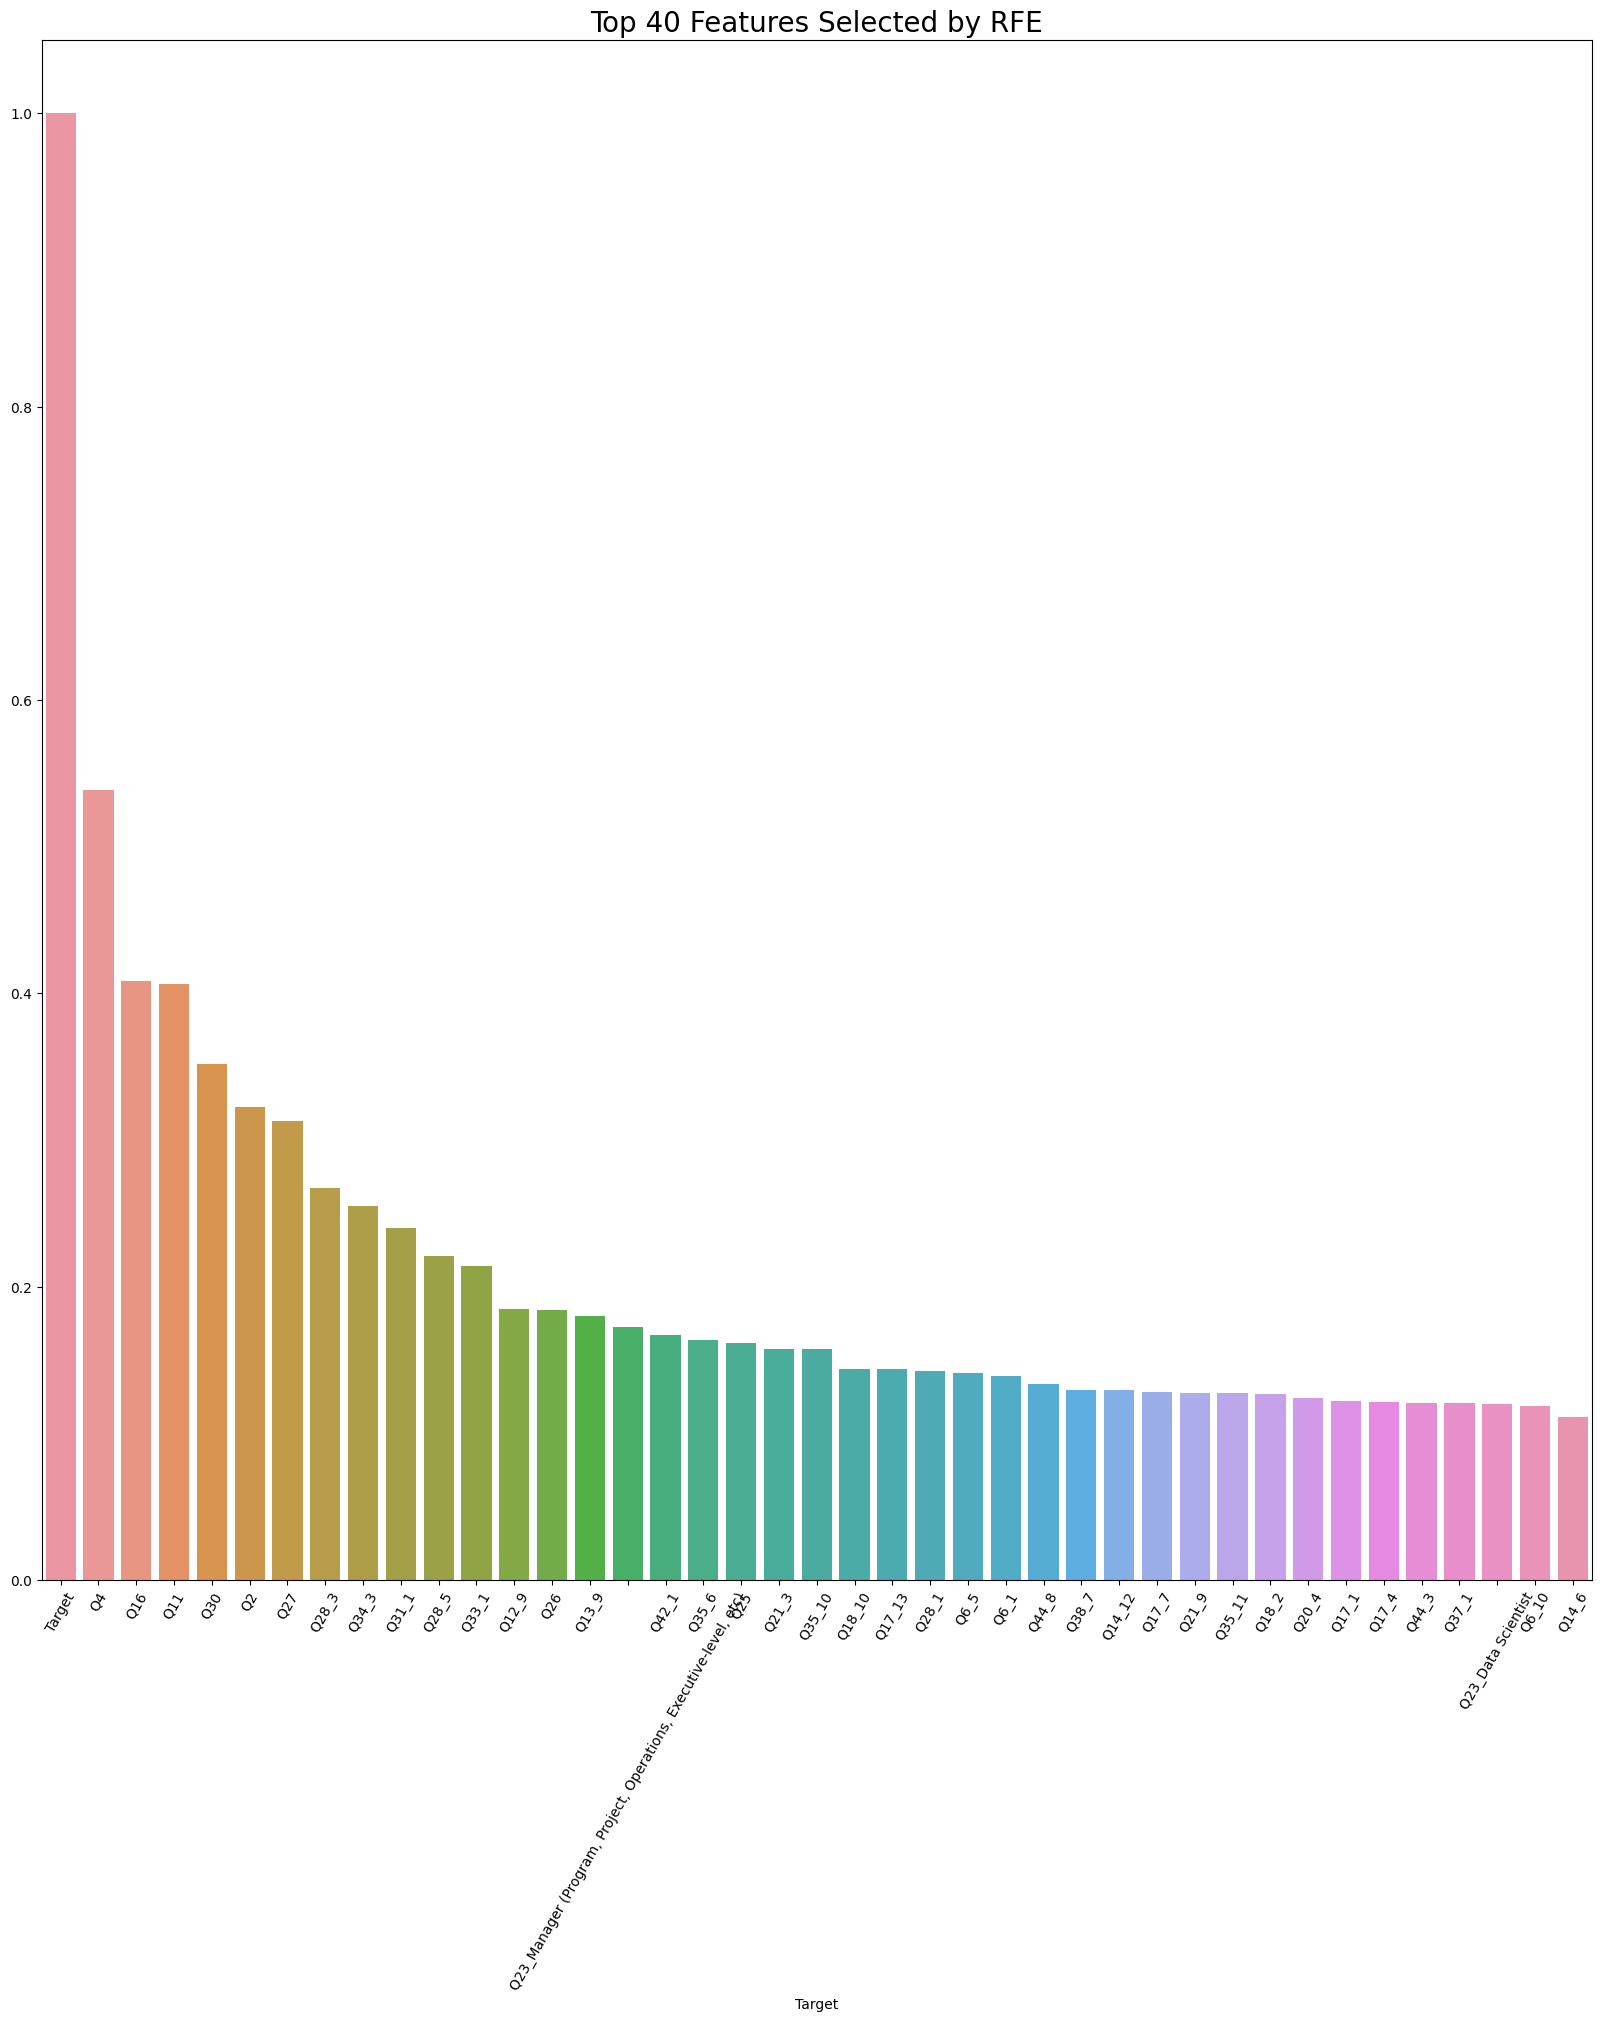

In [66]:
# Plot the barplot of the top 50 features (ranked by correlation).
ax = sns.barplot(x=salary_correlation_40.index, y = salary_correlation_40.values, 
                 data=salary_correlation_40, order = salary_correlation_40)
ax.set_xticklabels(salary_correlation_40.index,rotation = 60)
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.title('Top 40 Features Selected by RFE', fontsize = 20)
plt.savefig('f4.png',transparent = True)
plt.show()

### Select Features by Estimating Mutual Information

In [67]:
y = df['Target']

In [68]:
x = df.drop(['Target'], axis=1)

In [69]:
importance = mutual_info_classif(x,y)
feat_importance = pd.Series(importance, df.columns[0:len(df.columns)-1])
series = feat_importance.sort_values(ascending=False)

print(series.to_string())

Q4                                                                      0.231272
Q11                                                                     0.105524
Q16                                                                     0.098496
Q2                                                                      0.083124
Q27                                                                     0.070648
Q30                                                                     0.063651
Q28_5                                                                   0.042464
Q34_3                                                                   0.039209
Q28_3                                                                   0.038576
Q31_1                                                                   0.030003
Q26                                                                     0.028299
Q33_1                                                                   0.026717
Q13_9                       

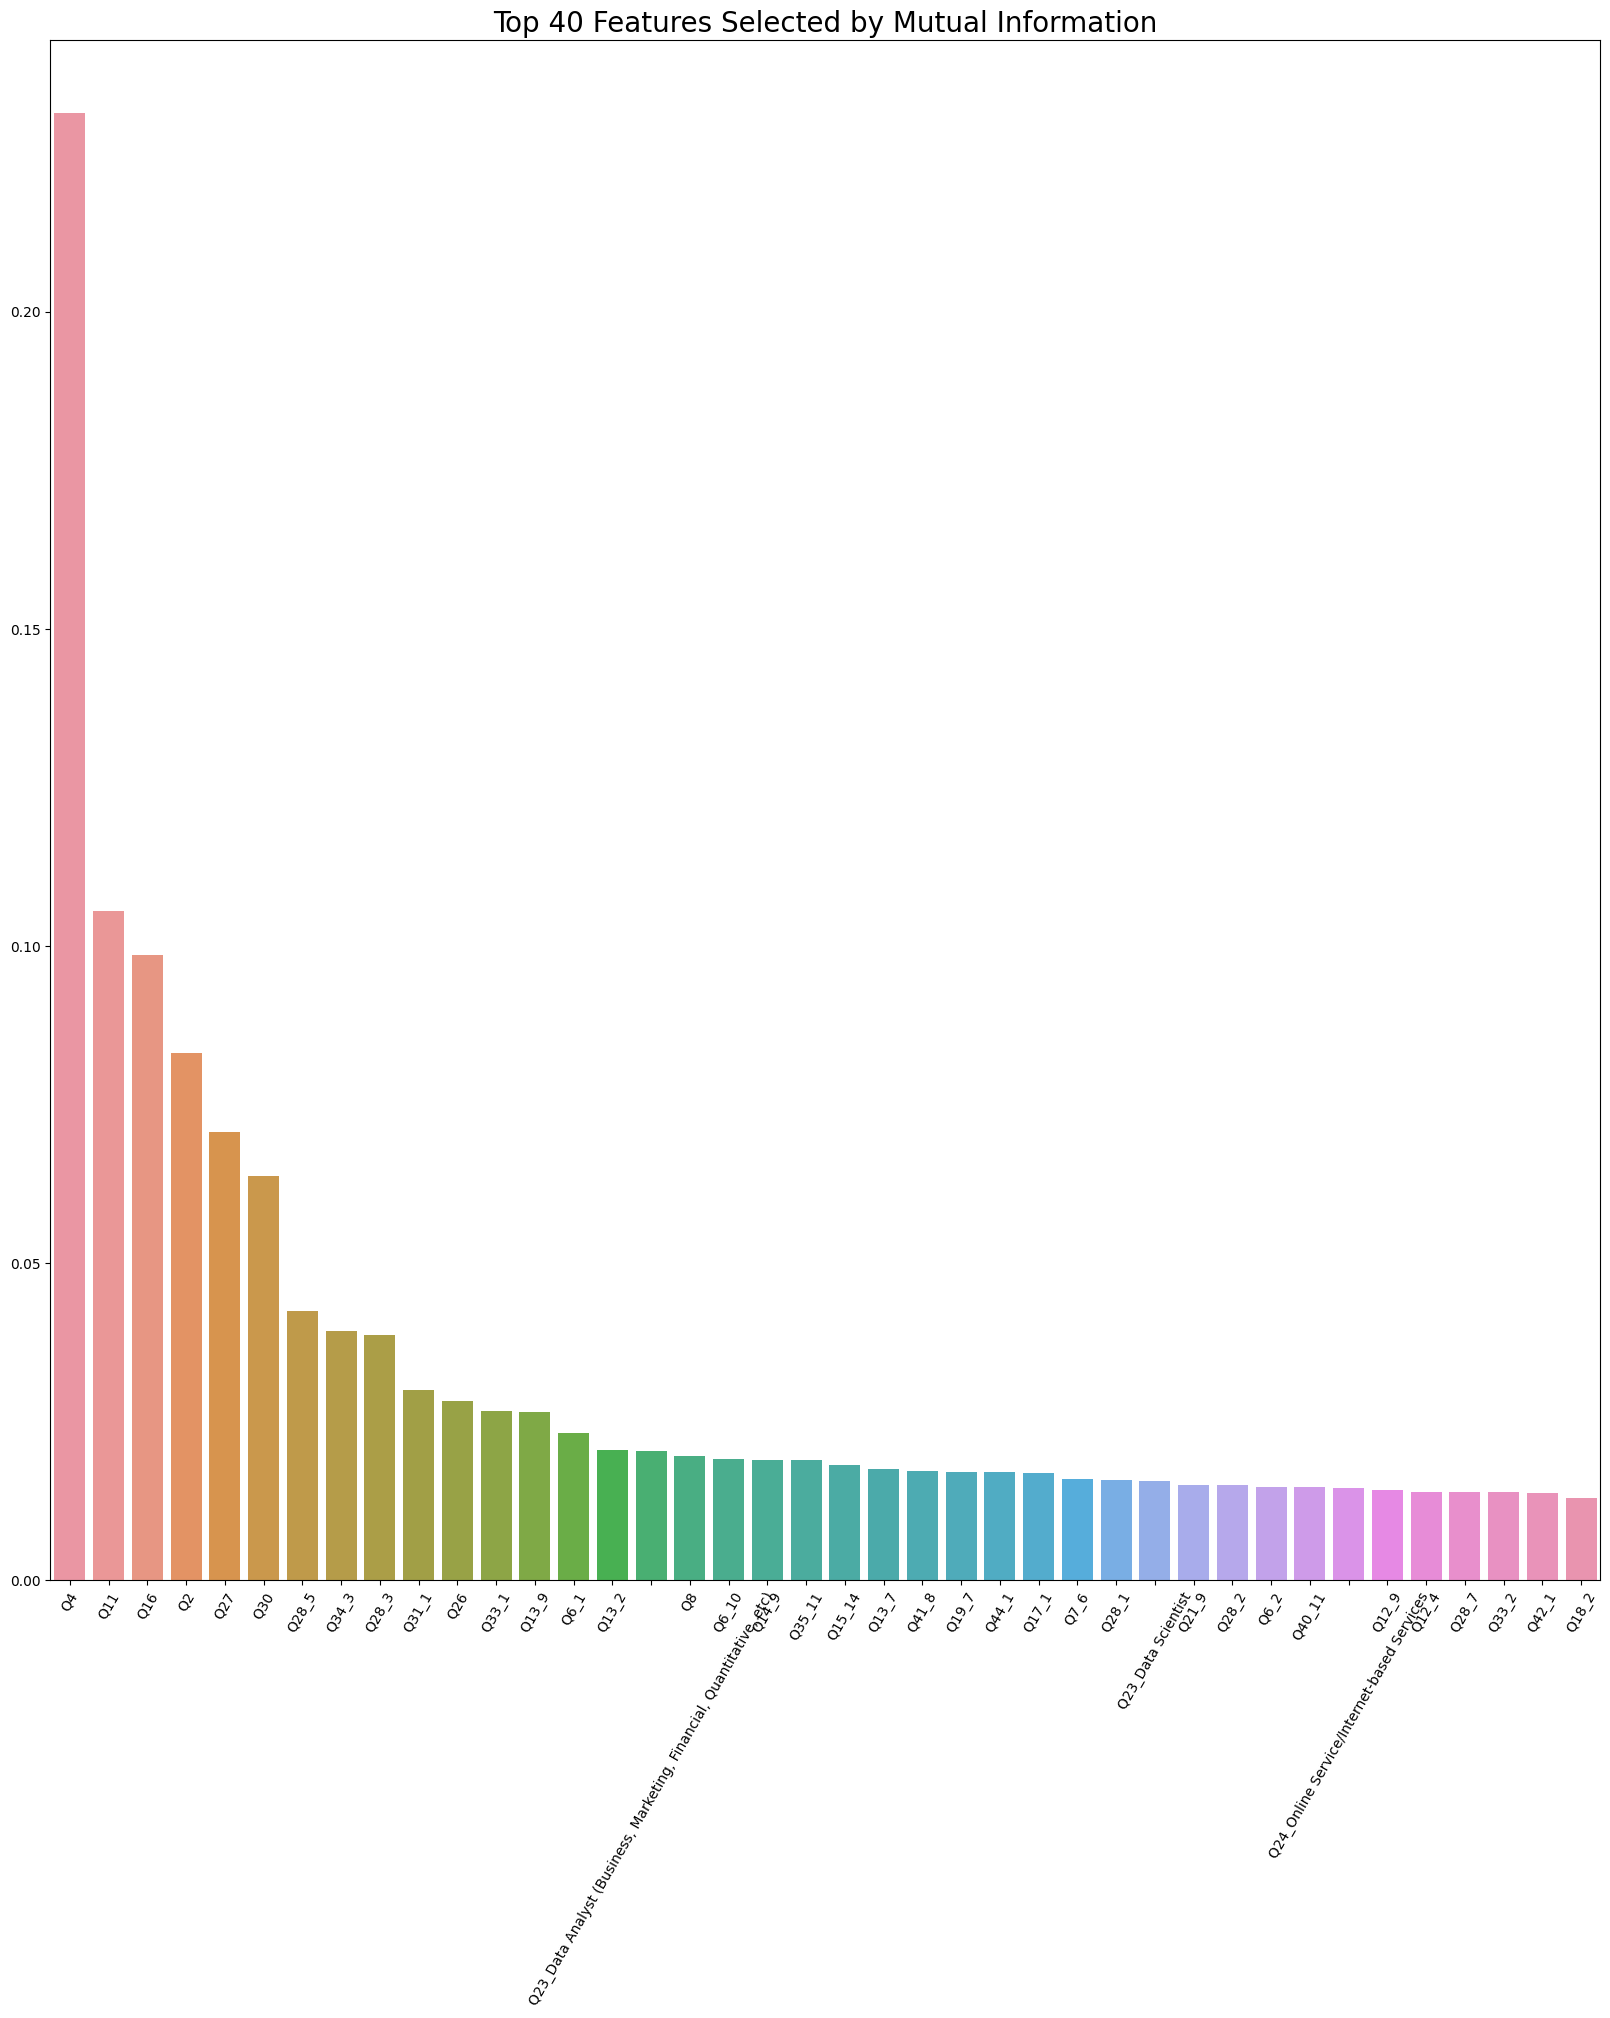

In [70]:
top_40_features = series[0:40]

# Plot the barplot of the top 50 features (ranked by correlation).
ax = sns.barplot(x=top_40_features.index, y = top_40_features.values, 
                 data=top_40_features, order = top_40_features)
ax.set_xticklabels(top_40_features.index,rotation = 60)
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.title('Top 40 Features Selected by Mutual Information', fontsize = 20)
plt.savefig('f25.png',transparent = True)
plt.show()

     The results are basically the same by two different method. I used the result from the second method to do folowing analysis

In [71]:
df_selected = df[top_40_features.index]
df_selected 

,Q4,Q11,Q16,Q2,Q27,Q30,Q28_5,Q34_3,Q28_3,Q31_1,Q26,Q33_1,Q13_9,Q6_1,Q13_2,"Q23_Data Analyst (Business, Marketing, Financial, Quantitative, etc)",Q8,Q6_10,Q14_9,Q35_11,Q15_14,Q13_7,Q41_8,Q19_7,Q44_1,Q17_1,Q7_6,Q28_1,Q23_Data Scientist,Q21_9,Q28_2,Q6_2,Q40_11,Q24_Online Service/Internet-based Services,Q12_9,Q12_4,Q28_7,Q33_2,Q42_1,Q18_2
0,3.0,5.0,2.0,8.0,3.0,3.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,3.0,5.0,4.0,3.0,4.0,2.0,0.0,0.0,1.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3.0,6.0,5.0,10.0,3.0,2.0,0.0,1.0,1.0,1.0,5.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.0,5.0,5.0,5.0,4.0,2.0,0.0,1.0,1.0,1.0,5.0,1.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,3.0,5.0,5.0,5.0,4.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7705,3.0,5.0,1.0,5.0,4.0,1.0,1.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7706,1.0,2.0,2.0,4.0,4.0,2.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7707,1.0,2.0,1.0,5.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7708,2.0,1.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [72]:
y = df['Target']
X = df_selected 

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1624, test_size = 0.3)

In [74]:
X_train

,Q4,Q11,Q16,Q2,Q27,Q30,Q28_5,Q34_3,Q28_3,Q31_1,Q26,Q33_1,Q13_9,Q6_1,Q13_2,"Q23_Data Analyst (Business, Marketing, Financial, Quantitative, etc)",Q8,Q6_10,Q14_9,Q35_11,Q15_14,Q13_7,Q41_8,Q19_7,Q44_1,Q17_1,Q7_6,Q28_1,Q23_Data Scientist,Q21_9,Q28_2,Q6_2,Q40_11,Q24_Online Service/Internet-based Services,Q12_9,Q12_4,Q28_7,Q33_2,Q42_1,Q18_2
1811,1.0,6.0,5.0,6.0,4.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
4515,1.0,0.0,1.0,3.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3734,3.0,1.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5190,3.0,6.0,1.0,9.0,2.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
6902,1.0,2.0,3.0,2.0,4.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,2.0,1.0,2.0,6.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3203,3.0,5.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4184,3.0,2.0,3.0,9.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1514,3.0,4.0,3.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Ordinal Logistics Regression 
    1. by model select
    2. by loop

In [75]:
## define a function to Ordinal Logistics Regression

def ordinal_logistic(X_train, y_train, X_val,model):
    
    # model = LogisticRegression(solver = 'liblinear')
   
    p_list = [] 
    p0 = 0 
    
    i = 0 #
    while i <= 12:
        
        # 0 is appended to the list and if not, 1 is appended.
        list1 = []
        for j in y_train:
            if j <= i:
                list1.append(0)
            else:
                list1.append(1)
                
        model.fit(X_train, list1)
        prob_class_0 = model.predict_proba(X_val)[:, 0] 
        p_list.append(prob_class_0 - p0)
        p0 = prob_class_0 
        i = 1 + i

    if i == 13: 
        list2 = []
        for k in y_train:
            if k <= i:
                list2.append(0)
            else:
                list2.append(1)      
        model.fit(X_train, list2)
        prob_class_0 = model.predict_proba(X_val)[:, 0]
        prob_class_1 = model.predict_proba(X_val)[:, 1]
        p_list.append(prob_class_0 - p0)
        p_list.append(prob_class_1)  
        
    p_list = np.array(p_list) 
    
    return p_list
    

In [76]:
# Implement the algorithm on a 10-fold cross-validation. The average accuracy is 37.669% with the standard deviation of 4.371%.
model = LogisticRegression()
# scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X_train)
accuracy = np.zeros(10)
np_idx = 0


for train_idx, test_idx in kfold.split(X_train):
    X_train_1, X_val = X_train.values[train_idx], X_train.values[test_idx]
    y_train_1, y_val = y_train.values[train_idx], y_train.values[test_idx]
    
    #X_train_1 = scaler.fit_transform(X_train_1)
    #X_val = scaler.transform(X_val)
    
    p_list = ordinal_logistic(X_train_1, y_train_1, X_val,model) 

    predict_class = np.argmax(p_list, axis = 0) 
    
    ACC = accuracy_score(y_val, predict_class) * 100 
    accuracy[np_idx] = ACC 
    
    np_idx += 1
    
    print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC,3))) 
    
print ("Average Score: {}%({}%)".format(round(np.mean(accuracy),3),round(np.var(accuracy),3)))
    



Fold 1: Accuracy: 39.074%
Fold 2: Accuracy: 34.63%
Fold 3: Accuracy: 35.741%
Fold 4: Accuracy: 40.185%
Fold 5: Accuracy: 39.444%
Fold 6: Accuracy: 39.259%
Fold 7: Accuracy: 38.704%
Fold 8: Accuracy: 32.468%
Fold 9: Accuracy: 40.074%
Fold 10: Accuracy: 37.848%
Average Score: 37.743%(6.083%)


###  Optimize Model: Grid Search

In [77]:
bias_list = [] # Create a list to store bias.
variance_list = [] # Create a list to store variances.

C = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,200,500,1000]
for c in C: # Try different C (penalty) values to see how model complexity affects bias and variances.
    np_idx = 0
    MSE_c = np.zeros(10)
    bias_c = np.zeros(10)
    variance_c = np.zeros(10)
    model = LogisticRegression(C=c)
    for train_idx, test_idx in kfold.split(X_train):

        X_train_1, X_val = X_train.values[train_idx], X_train.values[test_idx]
        y_train_1, y_val = y_train.values[train_idx], y_train.values[test_idx]

        #X_train_1 = scaler.fit_transform(X_train_1)
        #X_val = scaler.transform(X_val)
        
        p_train = ordinal_logistic(X_train_1, y_train_1, X_val,model) 
    
        predict_class_index = np.argmax(p_train, axis = 0) 
        
        MSE_c[np_idx] = np.mean((y_val - predict_class_index) ** 2) # Define MSE by definition.
        variance_c[np_idx] = np.var(predict_class_index) # Define variance by definition.
        bias_c[np_idx] = MSE_c[np_idx] - variance_c[np_idx] # Define bias by subtracting variance from MSE, by formula.
        
        np_idx += 1
    
    bias_list.append(np.mean(bias_c)) # Append mean bias, store as the bias for the current C
    variance_list.append(np.mean(variance_c)) # Append mean variance, store as the variance for the current C

print("The corresponding bias for C = 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100 are: ", bias_list)
print("The corresponding variances for C = 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100 are: ", variance_list)
           

The corresponding bias for C = 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100 are:  [34.21698996770425, 34.21698996770425, 10.220672831155913, -1.762886275917318, -4.240139480389256, -4.916365243181979, -4.885172658731422, -5.005285456912612, -5.0332045378408665, -4.951752234000315, -4.966739095236636]
The corresponding variances for C = 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100 are:  [0.0, 0.0, 13.922256805345153, 20.265701503018256, 21.336431310252514, 21.540422138667445, 21.659746973305737, 21.650993901906777, 21.68061881668371, 21.67942350452873, 21.684254040608728]


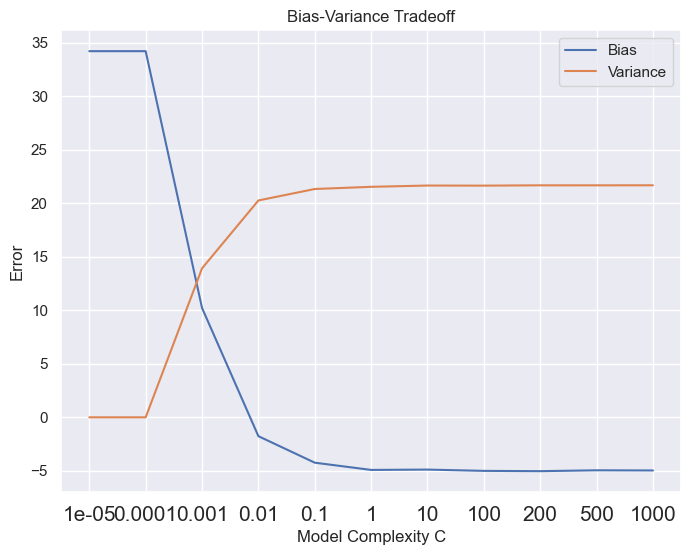

In [78]:
# Plot the bias-variance tradeoff for C graph. As model complexity increases, bias decrease and variances increase.
sns.set(rc={'figure.figsize':(8, 6)})
plt.plot(bias_list, label = "Bias")
plt.plot(variance_list, label = "Variance")
plt.title("Bias-Variance Tradeoff")
plt.xlabel('Model Complexity C')
plt.ylabel('Error')
plt.legend()
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7,8,9,10], C, fontsize = 15)
plt.yticks()
plt.savefig('f6.png',transparent = True)
plt.show()

### Model tuning:

In [79]:
warnings.filterwarnings("ignore")

model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X_train)

best_model = model
best_params = {}
best_accuracy = 0
best_f1_score = 0
best_std_accuracy = 0
best_std_f1_score = 0

C = [0.0001,0.001,0.01,0.1,1,5,10,100] 
Solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag'] # Try different solvers in this list.
for c in C:
    for solver in Solver: 
        model = LogisticRegression(solver = solver, C = c)
        scaler = StandardScaler()
        kfold = KFold(n_splits=10)
        kfold.get_n_splits(X_train)
        accuracy = np.zeros(10)
        F1_score = np.zeros(10)
        Recall_score = np.zeros(10)
        Precision_score = np.zeros(10)
        np_idx = 0

        for train_idx, test_idx in kfold.split(X_train):
            X_train_1, X_val = X_train.values[train_idx], X_train.values[test_idx]
            y_train_1, y_val = y_train.values[train_idx], y_train.values[test_idx]
    
            #X_train_1 = scaler.fit_transform(X_train_1)
            #X_val = scaler.transform(X_val)
    
            p_list = ordinal_logistic(X_train, y_train, X_val, model) 

            predict_class = np.argmax(p_list, axis = 0)
    
            ACC = accuracy_score(y_val, predict_class) * 100
            accuracy[np_idx] = ACC
            
            REC = recall_score(y_val, predict_class, average = 'macro')
            F1S = f1_score(y_val, predict_class, average = 'macro')
            F1_score[np_idx] = F1S
            Recall_score[np_idx] = REC
            
            np_idx += 1
        
        if np.mean(F1_score) > best_f1_score:
            best_model = model
            best_params = {'C':c, 'solver':solver}
            best_accuracy = np.mean(accuracy)
            best_f1_score = np.mean(F1_score)
            best_recall = np.mean(REC)
            best_std_accuracy = np.std(accuracy)
            best_std_f1_score = np.std(F1_score)
            best_std_recall = np.std(REC)
            
print (best_params)
print ("Best Accuracy: {}%({}%)".format(round(best_accuracy,3),round(best_std_accuracy,3)))
print ("Best F1 score: {}%({}%)".format(round(best_f1_score,3),round(best_std_f1_score,3)))
print ("Best Recall: {}%({}%)".format(round(best_recall,3),round(best_std_recall,3)))

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std_accuracy,3)))

{'C': 100, 'solver': 'liblinear'}
Best Accuracy: 39.8%(2.269%)
Best F1 score: 0.145%(0.016%)
Best Recall: 0.156%(0.0%)

The optimal log model uses C=100, and a liblinear solver, and has a cross validation score of 39.8% with a standard deviation of 2.269%


In [80]:
# Fit the best model from above.
model = LogisticRegression(C = 10, solver = 'lbfgs')
model.fit(X_train, y_train)

LogisticRegression(C=10)

In [81]:
# Get the coefficients of the best model, use as the feature importance.
coef = abs(model.coef_)
importance = np.zeros(coef.shape[1])
for i in range(40):
    importance[i] = np.mean(coef[:, i])
importance

array([0.40082388, 0.06180688, 0.08485738, 0.06422126, 0.08944655,
       0.19345421, 0.20951829, 0.28162197, 0.22019708, 0.23949932,
       0.06012623, 0.21212799, 0.22308842, 0.21854167, 0.12609924,
       0.38854592, 0.114777  , 0.14300439, 0.22271472, 0.19019656,
       0.23026257, 0.24640554, 0.162914  , 0.21322651, 0.11780026,
       0.26450548, 0.24171325, 0.17225262, 0.15783878, 0.09687889,
       0.13706213, 0.19619335, 0.13479274, 0.27536656, 0.21284481,
       0.33186104, 0.34658713, 0.18069444, 0.13917069, 0.22664642])

In [82]:
# Combine features with its coefficients, rank the importance.
part_4_importance = pd.Series(importance, top_40_features.index)
part_4_importance = part_4_importance.sort_values(ascending = False)
part_4_importance

Q4                                                                      0.400824
Q23_Data Analyst (Business, Marketing, Financial, Quantitative, etc)    0.388546
Q28_7                                                                   0.346587
Q12_4                                                                   0.331861
Q34_3                                                                   0.281622
Q24_Online Service/Internet-based Services                              0.275367
Q17_1                                                                   0.264505
Q13_7                                                                   0.246406
Q7_6                                                                    0.241713
Q31_1                                                                   0.239499
Q15_14                                                                  0.230263
Q18_2                                                                   0.226646
Q13_9                       

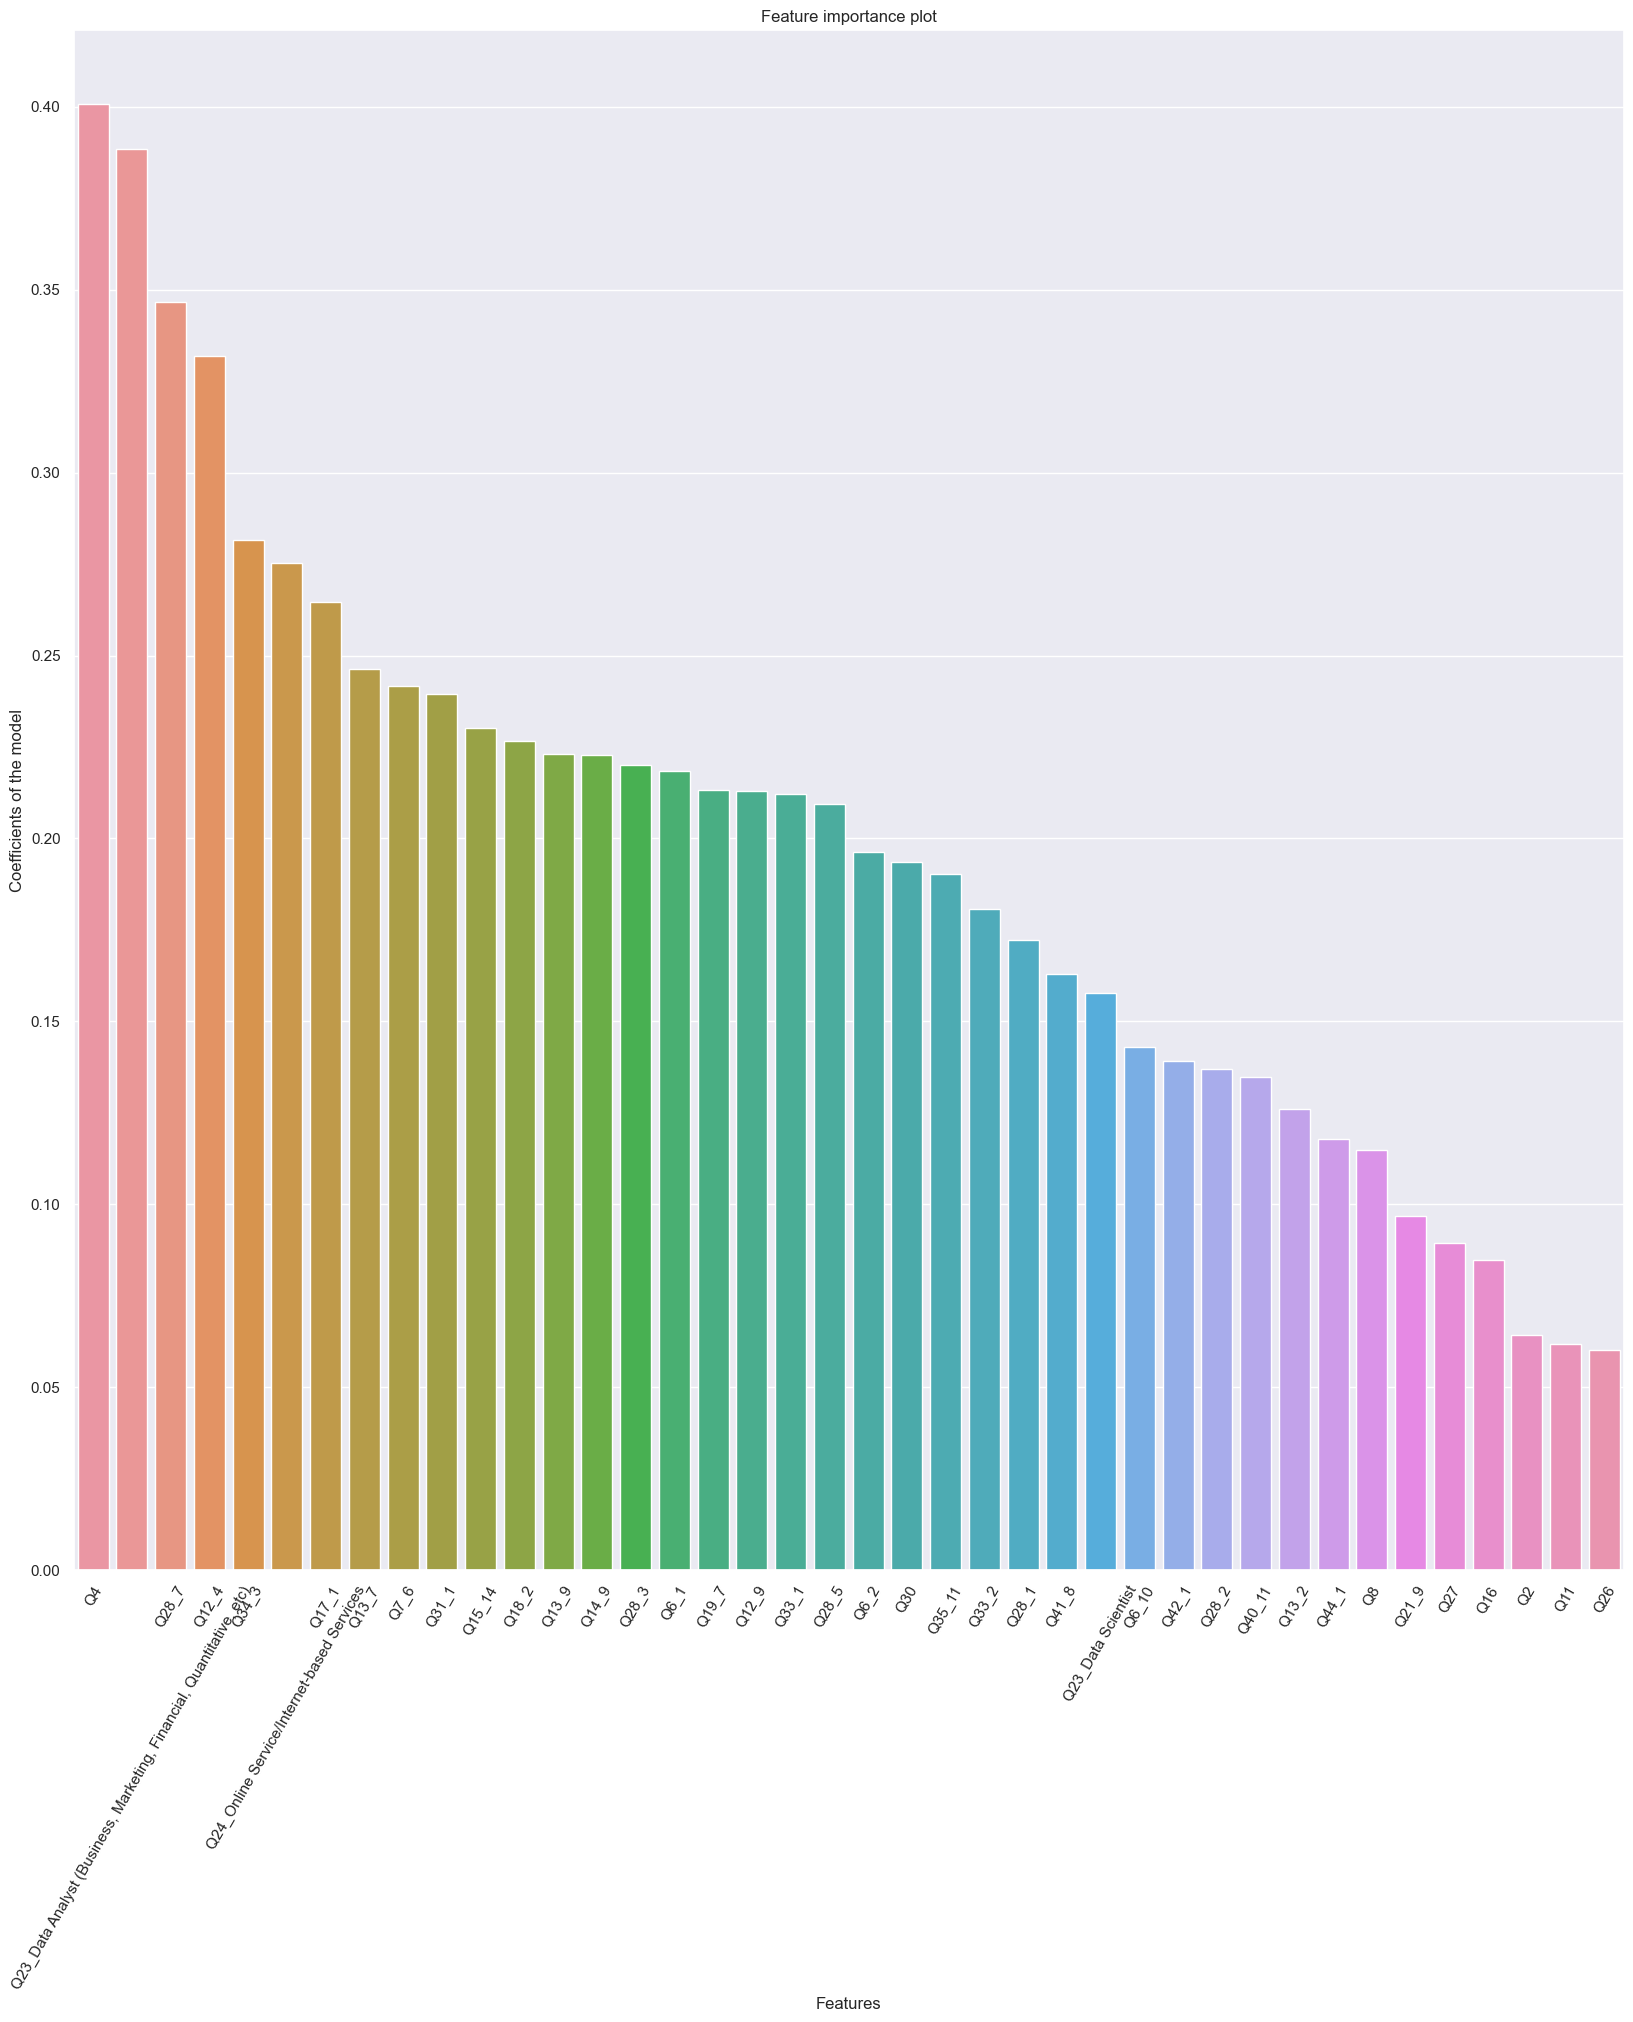

In [83]:
# Plot the feature importance graph.
ax = sns.barplot(x=part_4_importance.index, y = part_4_importance.values, data=part_4_importance, order=part_4_importance)
ax.set_xticklabels(part_4_importance.index,rotation = 60)
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.title('Feature importance plot')
plt.xlabel('Features')
plt.ylabel('Coefficients of the model')
plt.savefig('f7.png',transparent = True)
plt.show()

### Testing & Discussion:

In [84]:
# Apply the algorithm on the test set, and get the predicted probabilities of each observation for the test set.
p_list_test = ordinal_logistic(X_train, y_train, X_test, model)
p_list_test

array([[ 7.24290289e-02,  4.42413982e-02,  7.53091392e-01, ...,
         6.12544096e-01,  2.21069548e-02,  4.67535631e-01],
       [ 4.79745001e-02,  1.62064988e-02,  1.29505260e-01, ...,
         1.92239880e-01,  1.11699640e-02,  1.04678044e-01],
       [ 2.14539783e-02,  3.07066813e-02,  5.80331200e-02, ...,
         1.05312601e-01,  2.94977793e-02,  1.10809312e-01],
       ...,
       [ 4.78892149e-02,  2.04133790e-01, -4.87756345e-05, ...,
        -3.12521274e-03,  3.81911762e-01,  2.76383158e-03],
       [-2.69308575e-02,  1.14747221e-01,  9.17290438e-04, ...,
         5.88588409e-03,  1.68888109e-01,  4.57051291e-03],
       [ 6.73761537e-02,  1.33331367e-02,  7.18419311e-04, ...,
         1.56657664e-03,  2.12469970e-02,  1.44979348e-03]])

In [85]:
# Get the prediction of classification (which observation belongs to what class).
predict_class_index_test = np.argmax(p_list_test, axis = 0) 

# Get the recall score, precision score, and F1 score of the model on the test set.
ACC_test = accuracy_score(y_test, predict_class_index_test) * 100
REC_test = recall_score(y_test, predict_class_index_test, average = 'macro')
PRE_test = precision_score(y_test, predict_class_index_test, average = 'macro')
F1S_test = f1_score(y_test, predict_class_index_test, average = 'macro')
print('The accuracy for test set is:', ACC_test, '%,\nThe F1 score for test set is:', F1S_test)

The accuracy for test set is: 39.38607868568958 %,
The F1 score for test set is: 0.12239363763199422


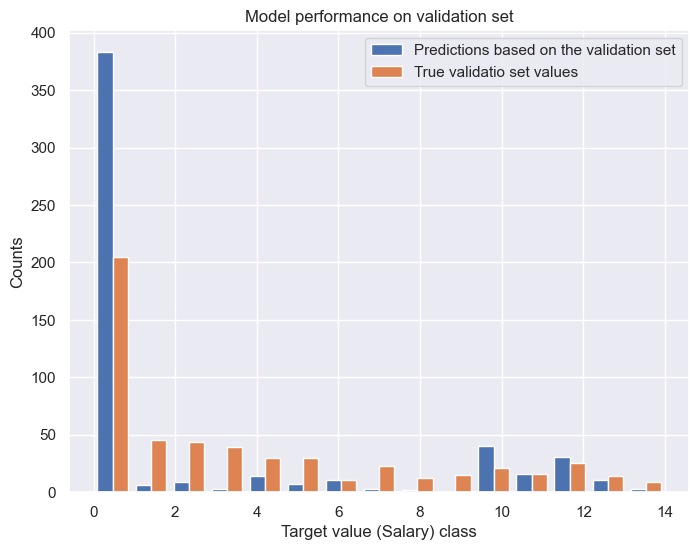

In [89]:
# Show the model performance on training set by plotting the distribution of predictions and true values.

plt.hist([predict_class_index,y_val],bins=15,
         label=['Predictions based on the validation set','True validatio set values'])
plt.xlabel('Target value (Salary) class')
plt.ylabel('Counts')
plt.title('Model performance on validation set')
plt.legend()
plt.savefig('f8.png',transparent = True)
plt.show()

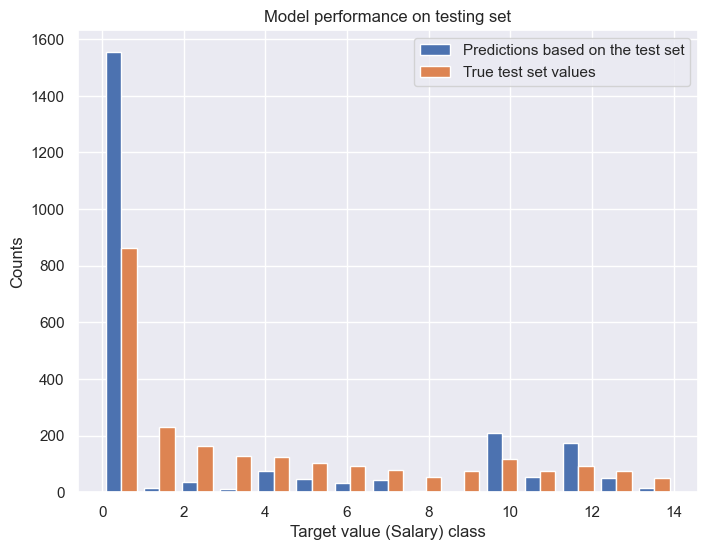

In [88]:
plt.hist([predict_class_index_test,y_test],bins=15,
         label=['Predictions based on the test set','True test set values'])

plt.xlabel('Target value (Salary) class')
plt.ylabel('Counts')
plt.title('Model performance on testing set')
plt.legend()
plt.savefig('f9.png',transparent = True)
plt.show()